# Loan Default Prediction - Part 10 - Hyperparameters in Gradient Boosted Decision Trees

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 10 of the project: Hyperparameters in Gradient Boosted Decision Trees.

In this part, I explore and tune the hyperparameters available in the the [XGBoost](https://github.com/dmlc/xgboost) eXtreme Gradient Boosting library. As there are a lot of hyperparameters, I will be roughly following [this guide](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) to decide the order of the parameters I am tuning. 

Note: The guide uses [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) in order to tune two parameters at a time, taking account of the correlation between some pairs of parameters. However, I found that the XGBoost __sklearn__ wrapper APIs work more slowly than the native APIs, so I am tuning the parameters one by one for faster evaluation.

I will first load the data and train the reference model.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils
import project_xgb_utils as xgb_utils

In [2]:
# Load the training data (imputed and normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

# Load the data into the XGBoost data structure
import xgboost as xgb
d_train = xgb.DMatrix(X_train.values, y_train.values)
d_valid = xgb.DMatrix(X_valid.values, y_valid.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


In [3]:
# Define parameters

param = {'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}
num_boost_round = 5

Time elapsed (Training): 4.8674 s
Accuracy Score (Training): 0.906620
ROCAUC Score (Training): 0.722820
PRAUC Score (Training): 0.152421
Accuracy Score (Validation): 0.912064
ROCAUC Score (Validation): 0.685919
PRAUC Score (Validation): 0.072673
Time elapsed (Evaluation): 0.3199 s


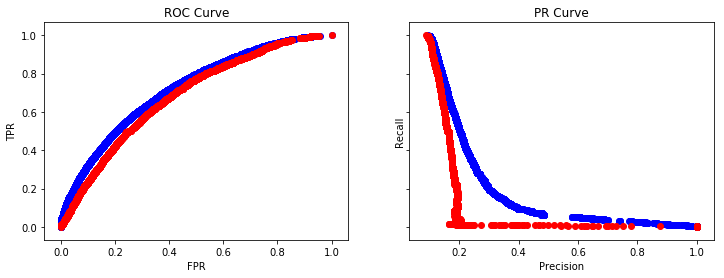

In [4]:
# Train the reference model

bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)

## Number of Boosting Rounds

XGBoost will perform __k__ rounds of boosting and produce __k__ trees.

In [5]:
# Define a list of values to try

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

----- k = 1 -----
Time elapsed (Training): 0.8277 s
Accuracy Score (Training): 0.906929
ROCAUC Score (Training): 0.682362
PRAUC Score (Training): 0.100309
Accuracy Score (Validation): 0.911353
ROCAUC Score (Validation): 0.657104
PRAUC Score (Validation): 0.043230
Time elapsed (Evaluation): 0.2299 s


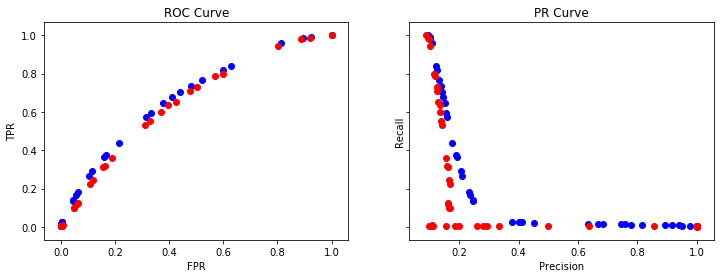

----- k = 2 -----
Time elapsed (Training): 1.6335 s
Accuracy Score (Training): 0.906620
ROCAUC Score (Training): 0.700017
PRAUC Score (Training): 0.123160
Accuracy Score (Validation): 0.912112
ROCAUC Score (Validation): 0.671243
PRAUC Score (Validation): 0.064034
Time elapsed (Evaluation): 0.2299 s


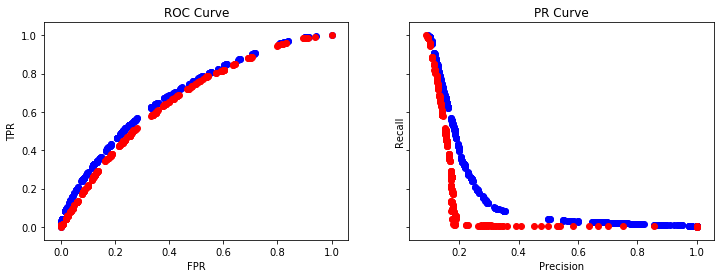

----- k = 3 -----
Time elapsed (Training): 2.4832 s
Accuracy Score (Training): 0.906632
ROCAUC Score (Training): 0.709962
PRAUC Score (Training): 0.133810
Accuracy Score (Validation): 0.912112
ROCAUC Score (Validation): 0.679856
PRAUC Score (Validation): 0.068910
Time elapsed (Evaluation): 0.2589 s


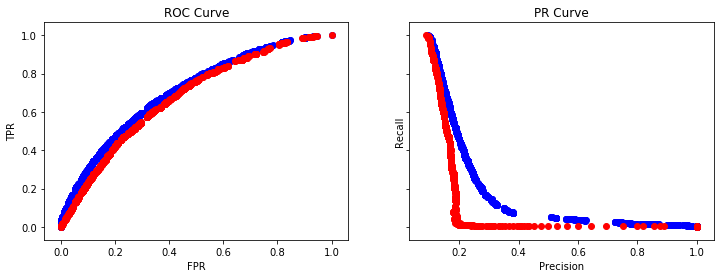

----- k = 4 -----
Time elapsed (Training): 3.1750 s
Accuracy Score (Training): 0.906668
ROCAUC Score (Training): 0.718188
PRAUC Score (Training): 0.143275
Accuracy Score (Validation): 0.912064
ROCAUC Score (Validation): 0.684371
PRAUC Score (Validation): 0.070883
Time elapsed (Evaluation): 0.2719 s


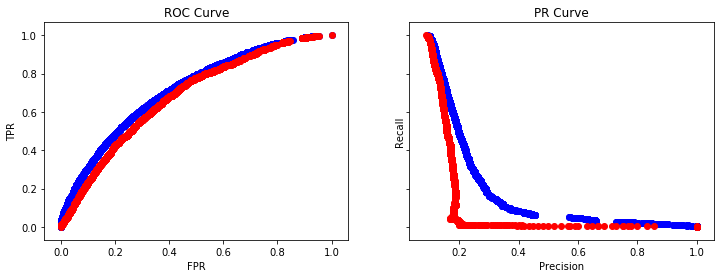

----- k = 5 -----
Time elapsed (Training): 3.9258 s
Accuracy Score (Training): 0.906620
ROCAUC Score (Training): 0.722820
PRAUC Score (Training): 0.152421
Accuracy Score (Validation): 0.912064
ROCAUC Score (Validation): 0.685919
PRAUC Score (Validation): 0.072673
Time elapsed (Evaluation): 0.3049 s


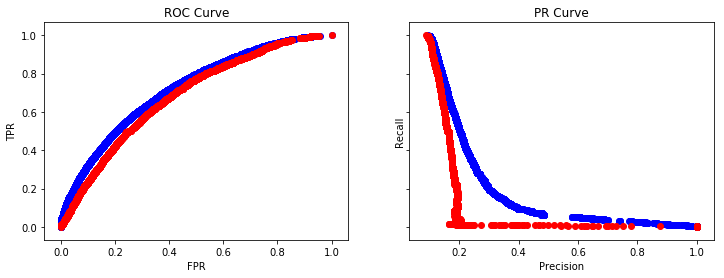

----- k = 6 -----
Time elapsed (Training): 4.6915 s
Accuracy Score (Training): 0.906514
ROCAUC Score (Training): 0.726784
PRAUC Score (Training): 0.156984
Accuracy Score (Validation): 0.912064
ROCAUC Score (Validation): 0.686641
PRAUC Score (Validation): 0.073507
Time elapsed (Evaluation): 0.3399 s


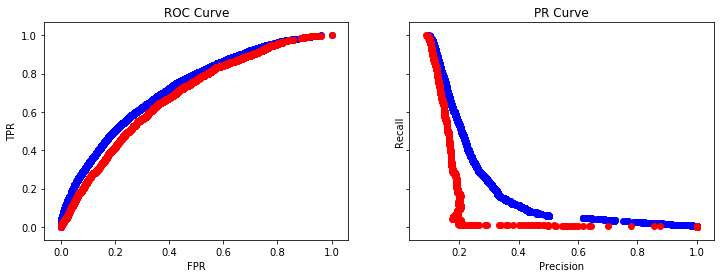

----- k = 7 -----
Time elapsed (Training): 5.6692 s
Accuracy Score (Training): 0.906573
ROCAUC Score (Training): 0.730319
PRAUC Score (Training): 0.159492
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.687586
PRAUC Score (Validation): 0.074327
Time elapsed (Evaluation): 0.3579 s


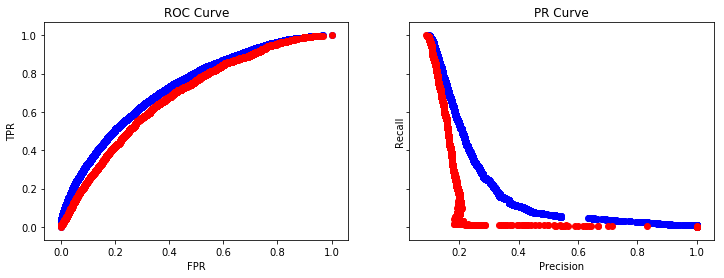

----- k = 8 -----
Time elapsed (Training): 6.2920 s
Accuracy Score (Training): 0.906585
ROCAUC Score (Training): 0.734032
PRAUC Score (Training): 0.164638
Accuracy Score (Validation): 0.912064
ROCAUC Score (Validation): 0.688824
PRAUC Score (Validation): 0.075306
Time elapsed (Evaluation): 0.4169 s


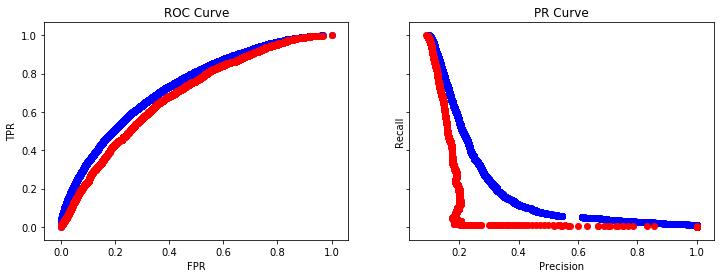

----- k = 9 -----
Time elapsed (Training): 7.1477 s
Accuracy Score (Training): 0.906573
ROCAUC Score (Training): 0.737386
PRAUC Score (Training): 0.169726
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.689017
PRAUC Score (Validation): 0.075037
Time elapsed (Evaluation): 0.4359 s


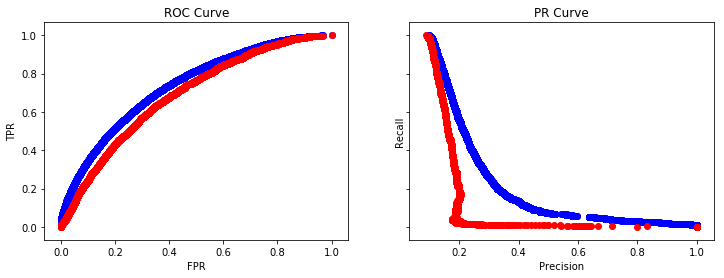

----- k = 10 -----
Time elapsed (Training): 7.8595 s
Accuracy Score (Training): 0.906514
ROCAUC Score (Training): 0.740094
PRAUC Score (Training): 0.172467
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.689239
PRAUC Score (Validation): 0.075940
Time elapsed (Evaluation): 0.4569 s


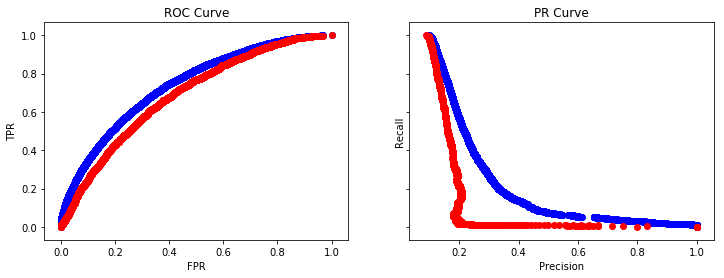

----- k = 11 -----
Time elapsed (Training): 8.9342 s
Accuracy Score (Training): 0.906466
ROCAUC Score (Training): 0.743047
PRAUC Score (Training): 0.176606
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.690381
PRAUC Score (Validation): 0.076848
Time elapsed (Evaluation): 0.4539 s


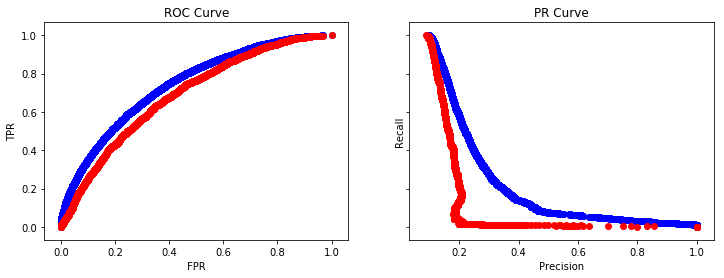

----- k = 12 -----
Time elapsed (Training): 9.8998 s
Accuracy Score (Training): 0.906490
ROCAUC Score (Training): 0.745343
PRAUC Score (Training): 0.180492
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.690897
PRAUC Score (Validation): 0.078309
Time elapsed (Evaluation): 0.4479 s


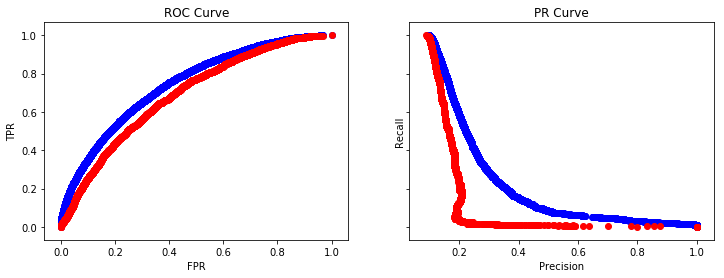

----- k = 13 -----
Time elapsed (Training): 10.2847 s
Accuracy Score (Training): 0.906466
ROCAUC Score (Training): 0.747893
PRAUC Score (Training): 0.182530
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.691353
PRAUC Score (Validation): 0.078288
Time elapsed (Evaluation): 0.4399 s


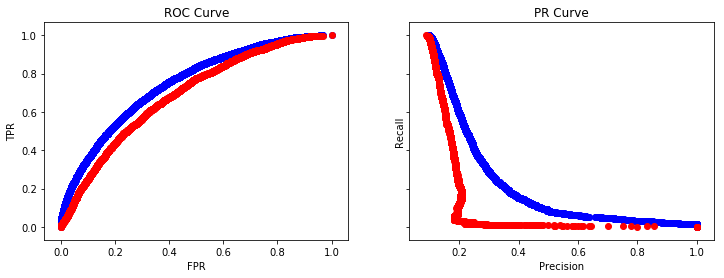

----- k = 14 -----
Time elapsed (Training): 11.1734 s
Accuracy Score (Training): 0.906443
ROCAUC Score (Training): 0.751009
PRAUC Score (Training): 0.186019
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.691761
PRAUC Score (Validation): 0.078364
Time elapsed (Evaluation): 0.4389 s


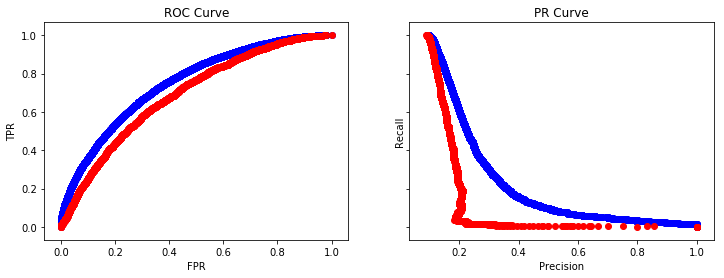

----- k = 15 -----
Time elapsed (Training): 11.9382 s
Accuracy Score (Training): 0.906443
ROCAUC Score (Training): 0.752971
PRAUC Score (Training): 0.188748
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.691908
PRAUC Score (Validation): 0.077861
Time elapsed (Evaluation): 0.4469 s


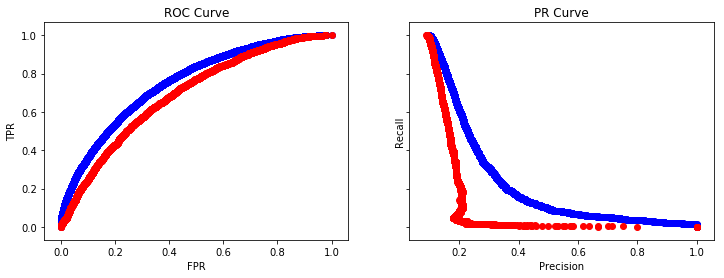

In [6]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    bst, fit_time = xgb_utils.train_model(param, d_train, k)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

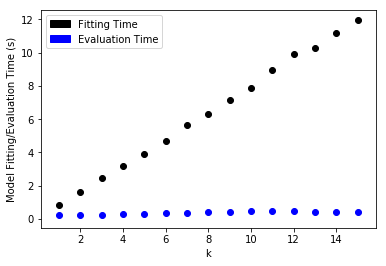

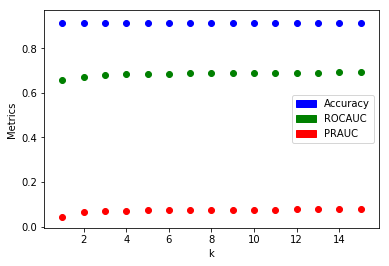

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     1    0.911353  0.657104  0.043230    0.827722     0.229927
1     2    0.912112  0.671243  0.064034    1.633466     0.229928
2     3    0.912112  0.679856  0.068910    2.483209     0.258917
3     4    0.912064  0.684371  0.070883    3.174986     0.271913
4     5    0.912064  0.685919  0.072673    3.925750     0.304903
5     6    0.912064  0.686641  0.073507    4.691489     0.339893
6     7    0.912017  0.687586  0.074327    5.669193     0.357885
7     8    0.912064  0.688824  0.075306    6.291994     0.416868
8     9    0.911970  0.689017  0.075037    7.147723     0.435861
9    10    0.911970  0.689239  0.075940    7.859479     0.456854
10   11    0.911970  0.690381  0.076848    8.934154     0.453856
11   12    0.911970  0.690897  0.078309    9.899846     0.447859
12   13    0.912017  0.691353  0.078288   10.284723     0.439860
13   14    0.912017  0.691761  0.078364   11.173425     0.438860
14   15    0.912017  0.69

In [7]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

As expected, the quality of the model improved as the number of rounds increased.

## Max Depth

The maximum depth of a tree before it stops growing.

In [8]:
# Update parameter value chosen by the previous experiment

num_boost_round = 15

In [9]:
# Define a list of values to try

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

----- k = 1 -----
Time elapsed (Training): 2.5652 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.636562
PRAUC Score (Training): 0.215786
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.640323
PRAUC Score (Validation): 0.217000
Time elapsed (Evaluation): 0.2199 s


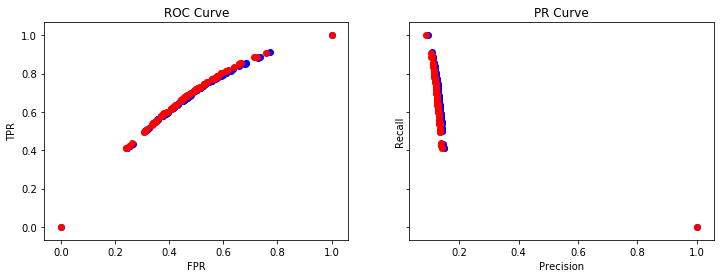

----- k = 2 -----
Time elapsed (Training): 4.2726 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.673241
PRAUC Score (Training): 0.081931
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.672421
PRAUC Score (Validation): 0.076583
Time elapsed (Evaluation): 0.2709 s


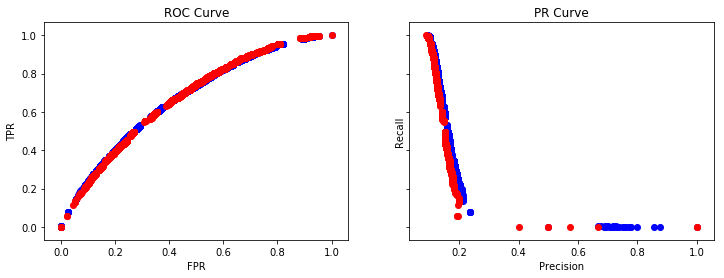

----- k = 3 -----
Time elapsed (Training): 8.7182 s
Accuracy Score (Training): 0.906241
ROCAUC Score (Training): 0.688233
PRAUC Score (Training): 0.088626
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.680795
PRAUC Score (Validation): 0.122234
Time elapsed (Evaluation): 0.4199 s


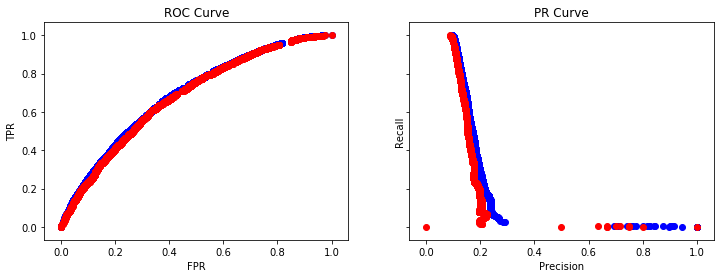

----- k = 4 -----
Time elapsed (Training): 11.5343 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.705441
PRAUC Score (Training): 0.102223
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.687630
PRAUC Score (Validation): 0.075863
Time elapsed (Evaluation): 0.5458 s


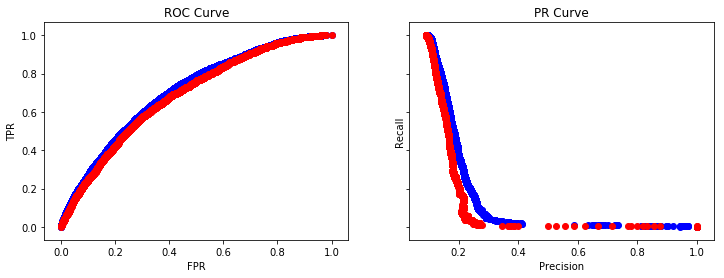

----- k = 5 -----
Time elapsed (Training): 13.8216 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.727194
PRAUC Score (Training): 0.131150
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.689641
PRAUC Score (Validation): 0.077995
Time elapsed (Evaluation): 0.5798 s


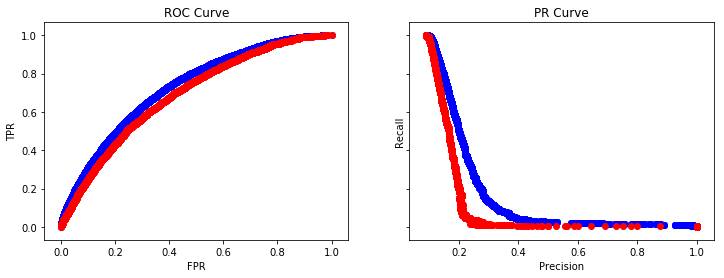

----- k = 6 -----
Time elapsed (Training): 18.6331 s
Accuracy Score (Training): 0.906443
ROCAUC Score (Training): 0.752971
PRAUC Score (Training): 0.188748
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.691908
PRAUC Score (Validation): 0.077861
Time elapsed (Evaluation): 0.5628 s


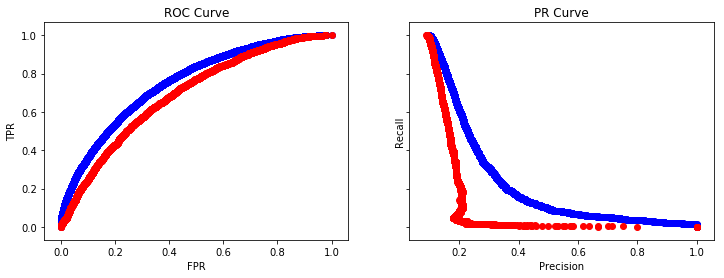

----- k = 7 -----
Time elapsed (Training): 20.1596 s
Accuracy Score (Training): 0.906585
ROCAUC Score (Training): 0.785450
PRAUC Score (Training): 0.273874
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.691652
PRAUC Score (Validation): 0.078039
Time elapsed (Evaluation): 0.6368 s


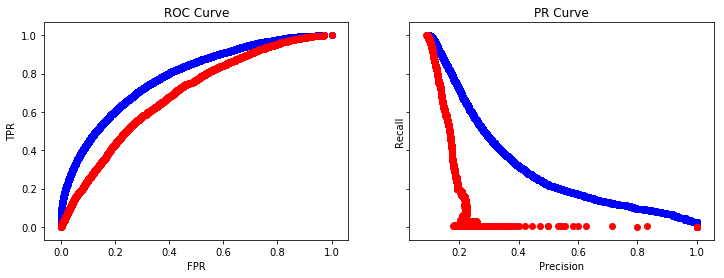

----- k = 8 -----
Time elapsed (Training): 15.1652 s
Accuracy Score (Training): 0.906905
ROCAUC Score (Training): 0.823406
PRAUC Score (Training): 0.376201
Accuracy Score (Validation): 0.912112
ROCAUC Score (Validation): 0.689235
PRAUC Score (Validation): 0.076463
Time elapsed (Evaluation): 0.4828 s


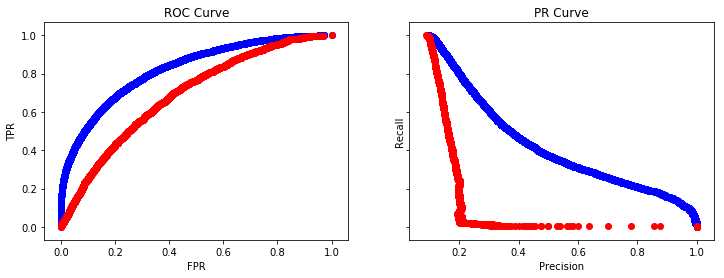

----- k = 9 -----
Time elapsed (Training): 16.9296 s
Accuracy Score (Training): 0.907663
ROCAUC Score (Training): 0.859349
PRAUC Score (Training): 0.482931
Accuracy Score (Validation): 0.912064
ROCAUC Score (Validation): 0.686794
PRAUC Score (Validation): 0.074955
Time elapsed (Evaluation): 0.4359 s


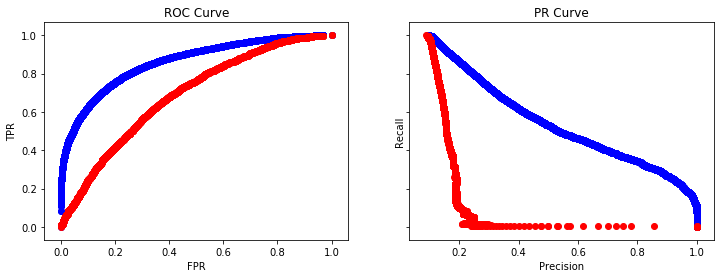

----- k = 10 -----
Time elapsed (Training): 19.3388 s
Accuracy Score (Training): 0.909228
ROCAUC Score (Training): 0.898857
PRAUC Score (Training): 0.596290
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.685351
PRAUC Score (Validation): 0.076132
Time elapsed (Evaluation): 0.4758 s


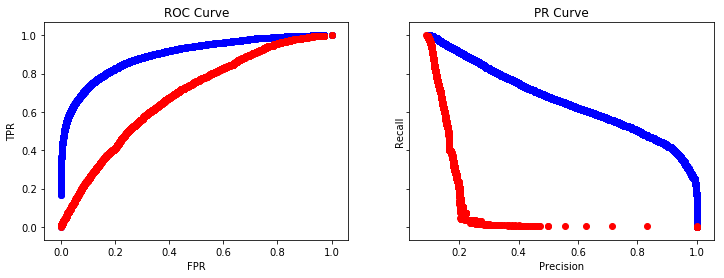

----- k = 11 -----
Time elapsed (Training): 20.7184 s
Accuracy Score (Training): 0.911420
ROCAUC Score (Training): 0.927493
PRAUC Score (Training): 0.687700
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.681539
PRAUC Score (Validation): 0.072008
Time elapsed (Evaluation): 0.4529 s


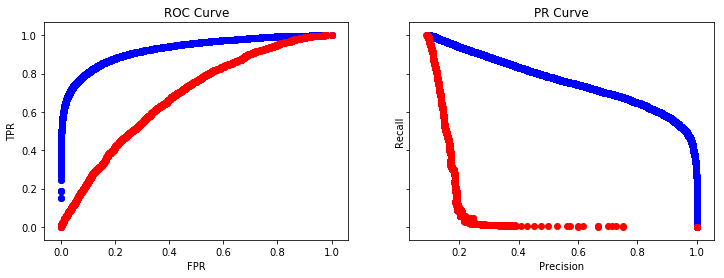

----- k = 12 -----
Time elapsed (Training): 22.9157 s
Accuracy Score (Training): 0.915154
ROCAUC Score (Training): 0.951155
PRAUC Score (Training): 0.753145
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.680392
PRAUC Score (Validation): 0.072576
Time elapsed (Evaluation): 0.4539 s


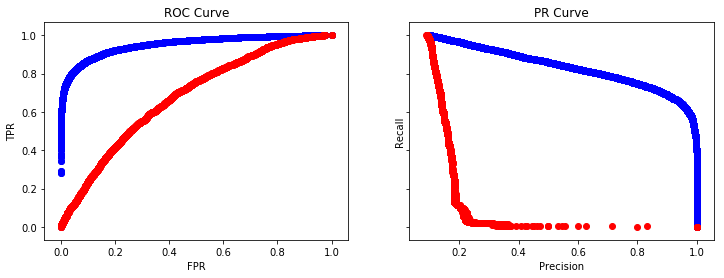

----- k = 13 -----
Time elapsed (Training): 24.8301 s
Accuracy Score (Training): 0.920108
ROCAUC Score (Training): 0.966370
PRAUC Score (Training): 0.804674
Accuracy Score (Validation): 0.911780
ROCAUC Score (Validation): 0.672073
PRAUC Score (Validation): 0.068057
Time elapsed (Evaluation): 0.4719 s


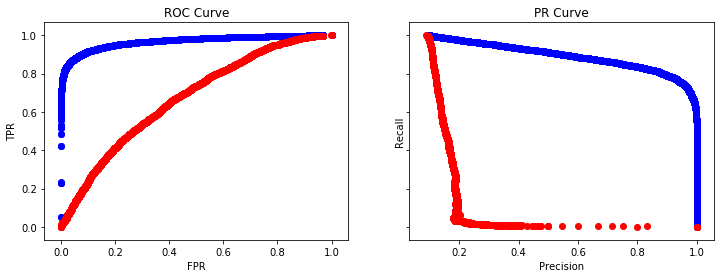

----- k = 14 -----
Time elapsed (Training): 27.1893 s
Accuracy Score (Training): 0.927254
ROCAUC Score (Training): 0.980910
PRAUC Score (Training): 0.847019
Accuracy Score (Validation): 0.912112
ROCAUC Score (Validation): 0.670998
PRAUC Score (Validation): 0.066249
Time elapsed (Evaluation): 0.4329 s


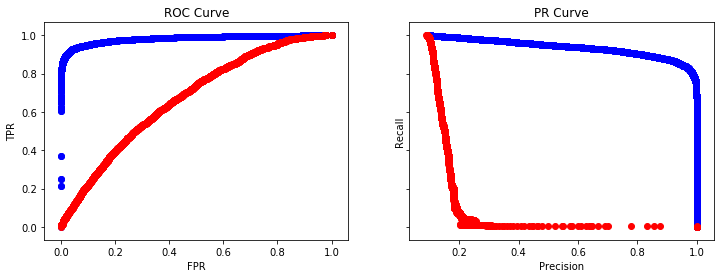

----- k = 15 -----
Time elapsed (Training): 30.7842 s
Accuracy Score (Training): 0.934697
ROCAUC Score (Training): 0.986257
PRAUC Score (Training): 0.866030
Accuracy Score (Validation): 0.911875
ROCAUC Score (Validation): 0.670593
PRAUC Score (Validation): 0.067080
Time elapsed (Evaluation): 0.4868 s


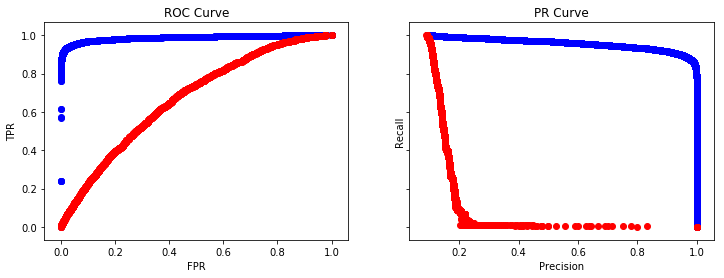

In [10]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    param.update({'max_depth': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

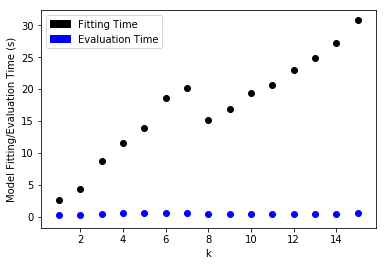

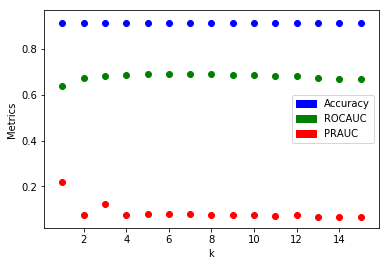

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     1    0.911827  0.640323  0.217000    2.565182     0.219931
1     2    0.911827  0.672421  0.076583    4.272638     0.270913
2     3    0.911922  0.680795  0.122234    8.718224     0.419865
3     4    0.912017  0.687630  0.075863   11.534325     0.545828
4     5    0.911970  0.689641  0.077995   13.821596     0.579817
5     6    0.912017  0.691908  0.077861   18.633065     0.562821
6     7    0.911922  0.691652  0.078039   20.159578     0.636798
7     8    0.912112  0.689235  0.076463   15.165167     0.482846
8     9    0.912064  0.686794  0.074955   16.929591     0.435861
9    10    0.911970  0.685351  0.076132   19.338822     0.475848
10   11    0.911922  0.681539  0.072008   20.718400     0.452856
11   12    0.911922  0.680392  0.072576   22.915698     0.453856
12   13    0.911780  0.672073  0.068057   24.830074     0.471850
13   14    0.912112  0.670998  0.066249   27.189322     0.432862
14   15    0.911875  0.67

In [11]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The best ROCAUC occured at __k__=6, which is also where the curves of the training and the validation sets start to split. Above this number, we can see that overfitting gets more and more pronounced.

## Min Child Weight

Minimum sum of instance weight required to be in a leaf node. Nodes stop to split if the instance weight is less than __min_child_weight__.

In [12]:
# Update parameter value chosen by the previous experiment

param.update({'max_depth': 6})
print(param)

{'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6}


In [13]:
# Define a list of values to try

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

----- k = 1 -----
Time elapsed (Training): 11.4364 s
Accuracy Score (Training): 0.906443
ROCAUC Score (Training): 0.752971
PRAUC Score (Training): 0.188748
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.691908
PRAUC Score (Validation): 0.077861
Time elapsed (Evaluation): 0.4479 s


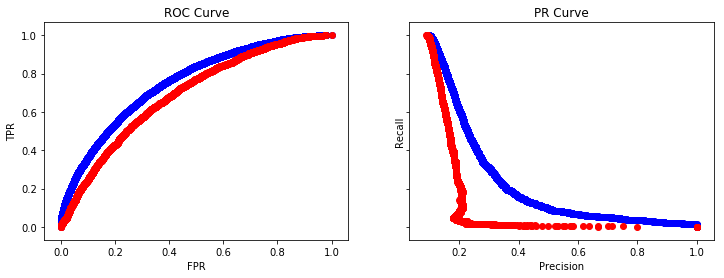

----- k = 2 -----
Time elapsed (Training): 11.5573 s
Accuracy Score (Training): 0.906324
ROCAUC Score (Training): 0.753071
PRAUC Score (Training): 0.179713
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.692161
PRAUC Score (Validation): 0.077178
Time elapsed (Evaluation): 0.4359 s


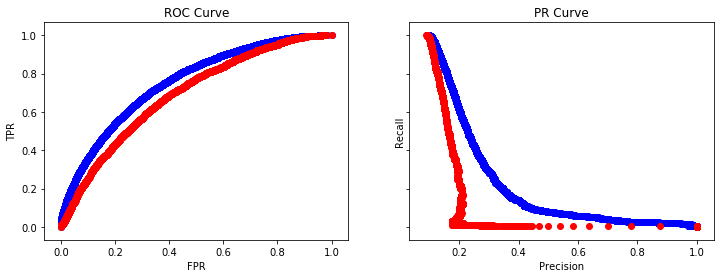

----- k = 3 -----
Time elapsed (Training): 11.2354 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.753377
PRAUC Score (Training): 0.177380
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.692868
PRAUC Score (Validation): 0.077749
Time elapsed (Evaluation): 0.4579 s


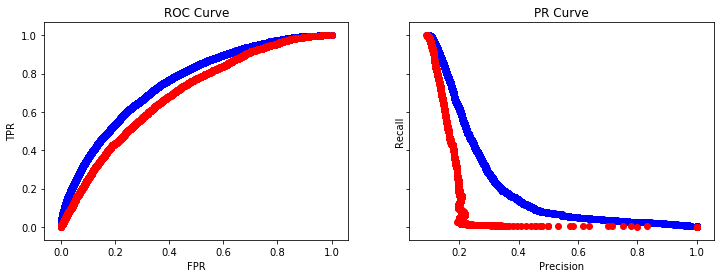

----- k = 4 -----
Time elapsed (Training): 11.1254 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4529 s


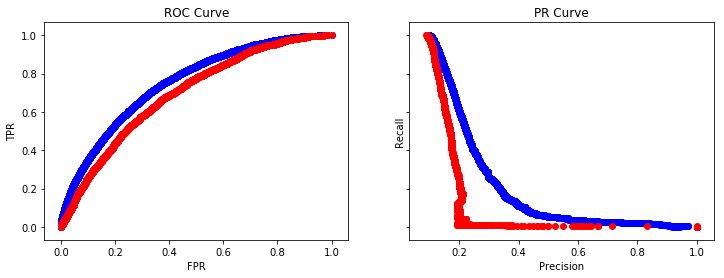

----- k = 5 -----
Time elapsed (Training): 10.9685 s
Accuracy Score (Training): 0.906289
ROCAUC Score (Training): 0.753038
PRAUC Score (Training): 0.167437
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.690772
PRAUC Score (Validation): 0.074393
Time elapsed (Evaluation): 0.4629 s


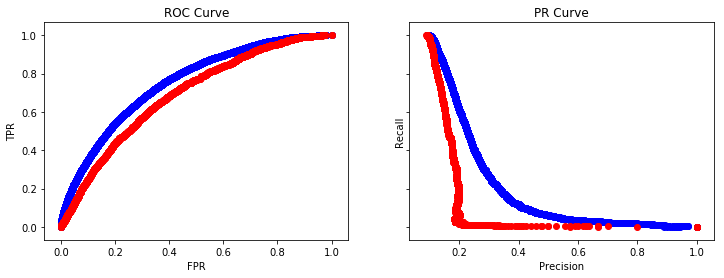

----- k = 6 -----
Time elapsed (Training): 11.0685 s
Accuracy Score (Training): 0.906277
ROCAUC Score (Training): 0.752965
PRAUC Score (Training): 0.164086
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.692624
PRAUC Score (Validation): 0.076239
Time elapsed (Evaluation): 0.4329 s


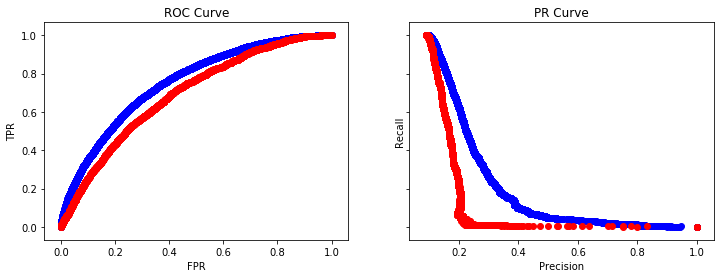

----- k = 7 -----
Time elapsed (Training): 11.1464 s
Accuracy Score (Training): 0.906265
ROCAUC Score (Training): 0.752040
PRAUC Score (Training): 0.163330
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.690348
PRAUC Score (Validation): 0.075979
Time elapsed (Evaluation): 0.4938 s


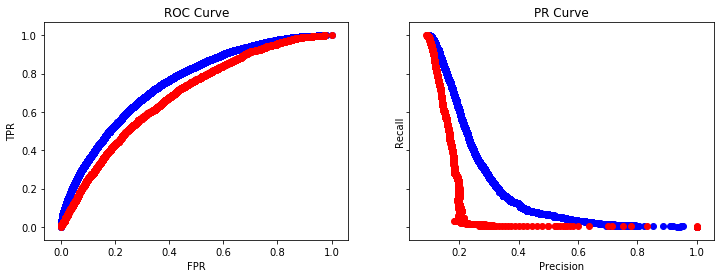

----- k = 8 -----
Time elapsed (Training): 11.7253 s
Accuracy Score (Training): 0.906229
ROCAUC Score (Training): 0.751321
PRAUC Score (Training): 0.159700
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.691089
PRAUC Score (Validation): 0.076044
Time elapsed (Evaluation): 0.4489 s


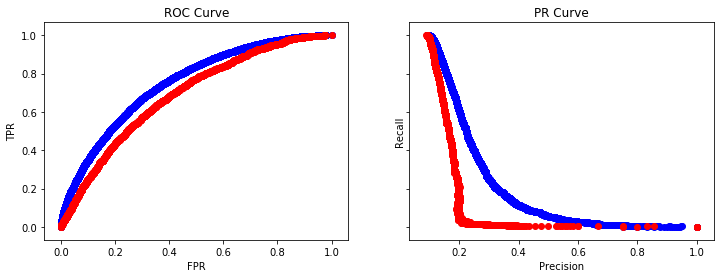

----- k = 9 -----
Time elapsed (Training): 12.5390 s
Accuracy Score (Training): 0.906241
ROCAUC Score (Training): 0.752141
PRAUC Score (Training): 0.157021
Accuracy Score (Validation): 0.911875
ROCAUC Score (Validation): 0.689438
PRAUC Score (Validation): 0.076562
Time elapsed (Evaluation): 0.4778 s


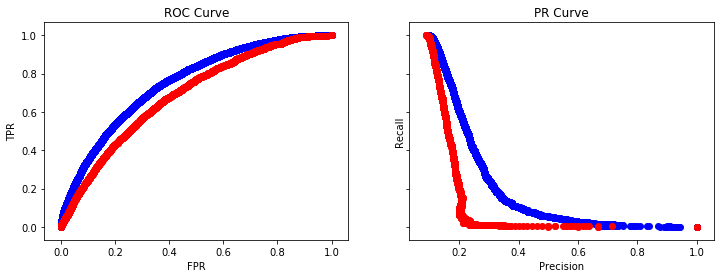

----- k = 10 -----
Time elapsed (Training): 12.8689 s
Accuracy Score (Training): 0.906123
ROCAUC Score (Training): 0.752648
PRAUC Score (Training): 0.158211
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.692113
PRAUC Score (Validation): 0.077234
Time elapsed (Evaluation): 0.4609 s


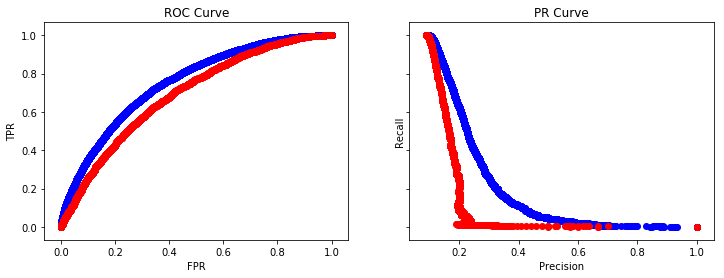

----- k = 11 -----
Time elapsed (Training): 12.1401 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.751161
PRAUC Score (Training): 0.156659
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.691158
PRAUC Score (Validation): 0.121163
Time elapsed (Evaluation): 0.4519 s


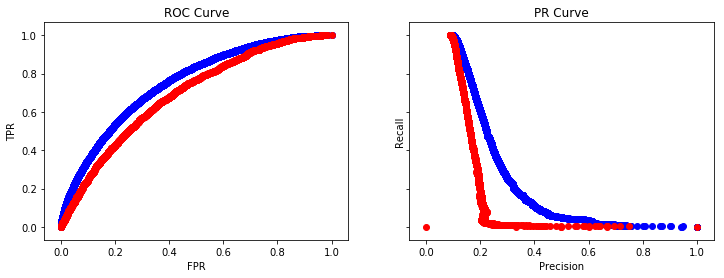

----- k = 12 -----
Time elapsed (Training): 11.6993 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.751523
PRAUC Score (Training): 0.158361
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.692215
PRAUC Score (Validation): 0.076783
Time elapsed (Evaluation): 0.5568 s


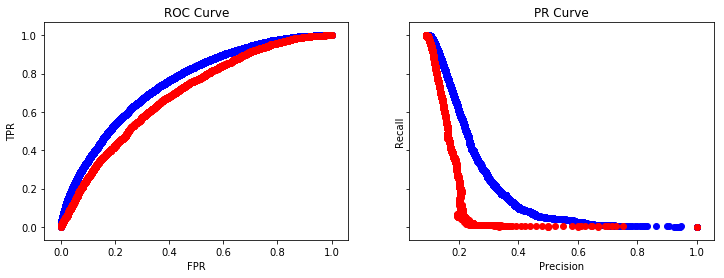

----- k = 13 -----
Time elapsed (Training): 12.4670 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.750251
PRAUC Score (Training): 0.157653
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.691370
PRAUC Score (Validation): 0.122694
Time elapsed (Evaluation): 0.4619 s


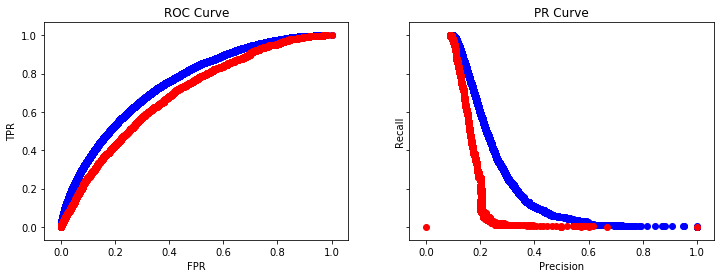

----- k = 14 -----
Time elapsed (Training): 11.5223 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.751270
PRAUC Score (Training): 0.149385
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.692501
PRAUC Score (Validation): 0.121518
Time elapsed (Evaluation): 0.4878 s


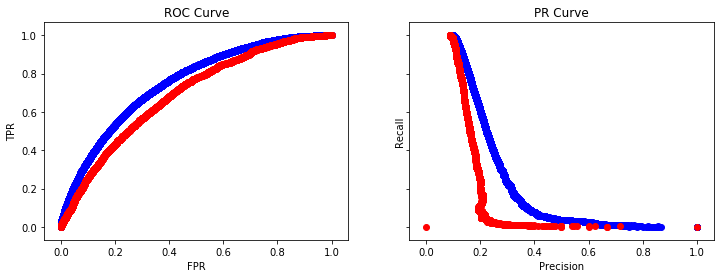

----- k = 15 -----
Time elapsed (Training): 12.7229 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.750762
PRAUC Score (Training): 0.148774
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.691358
PRAUC Score (Validation): 0.077123
Time elapsed (Evaluation): 0.4599 s


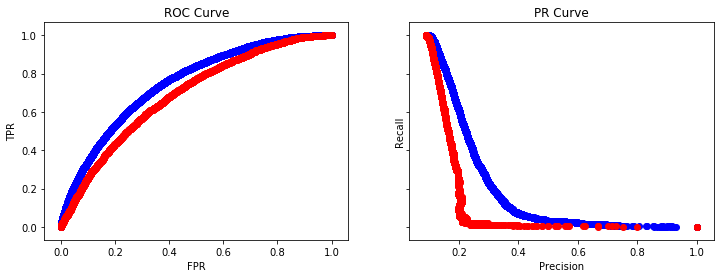

In [14]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    param.update({'min_child_weight': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

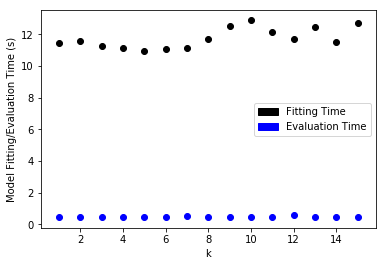

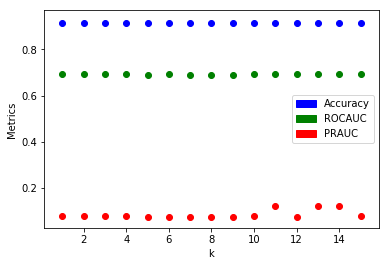

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     1    0.912017  0.691908  0.077861   11.436357     0.447857
1     2    0.912017  0.692161  0.077178   11.557315     0.435862
2     3    0.912017  0.692868  0.077749   11.235420     0.457854
3     4    0.912017  0.695386  0.078347   11.125441     0.452856
4     5    0.912017  0.690772  0.074393   10.968506     0.462853
5     6    0.911970  0.692624  0.076239   11.068472     0.432863
6     7    0.912017  0.690348  0.075979   11.146435     0.493843
7     8    0.911970  0.691089  0.076044   11.725260     0.448858
8     9    0.911875  0.689438  0.076562   12.539004     0.477848
9    10    0.911827  0.692113  0.077234   12.868900     0.460854
10   11    0.911827  0.691158  0.121163   12.140132     0.451857
11   12    0.911827  0.692215  0.076783   11.699260     0.556823
12   13    0.911827  0.691370  0.122694   12.467013     0.461853
13   14    0.911827  0.692501  0.121518   11.522312     0.487844
14   15    0.911827  0.69

In [15]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

As the complexity of the tree has already been somewhat limited by __max_depth__, we don't see significant change in the performance here. Nevertheless, I select the optimal value __min_child_weight__=4 in the following experiments.

## Gamma

__Gamma__, also known as __min_split_loss__, is the minimum loss reduction required further partition a leaf node. The default value is 0.

In [16]:
# Update parameter value chosen by the previous experiment

param.update({'min_child_weight': 4})
print(param)

{'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'min_child_weight': 4}


In [17]:
# Define a list of values to try

ks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

----- k = 0.000000 -----
Time elapsed (Training): 11.8402 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.5098 s


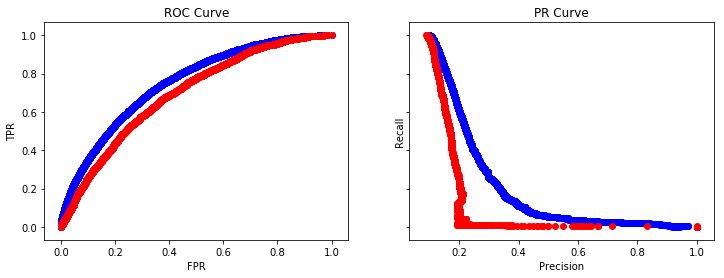

----- k = 0.100000 -----
Time elapsed (Training): 11.5193 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4519 s


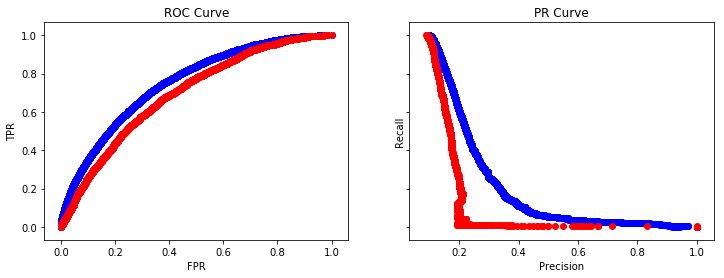

----- k = 0.200000 -----
Time elapsed (Training): 11.7123 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4878 s


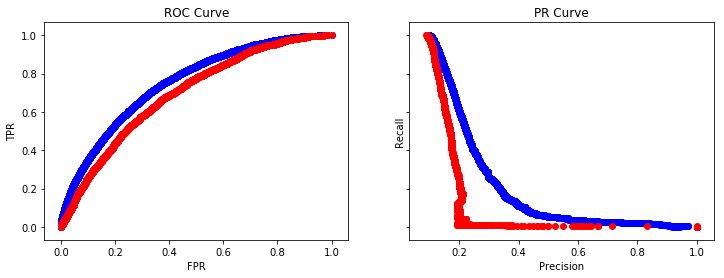

----- k = 0.300000 -----
Time elapsed (Training): 11.2754 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751986
PRAUC Score (Training): 0.166857
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695359
PRAUC Score (Validation): 0.078336
Time elapsed (Evaluation): 0.4758 s


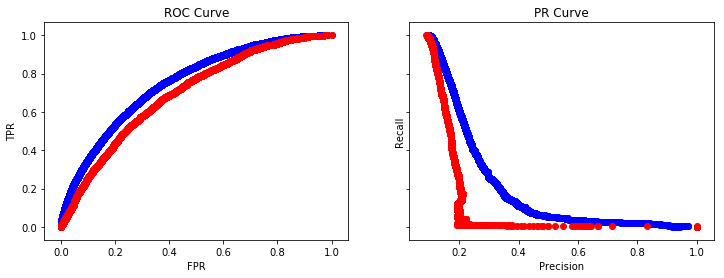

----- k = 0.400000 -----
Time elapsed (Training): 11.8472 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751971
PRAUC Score (Training): 0.166846
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695372
PRAUC Score (Validation): 0.078343
Time elapsed (Evaluation): 0.4729 s


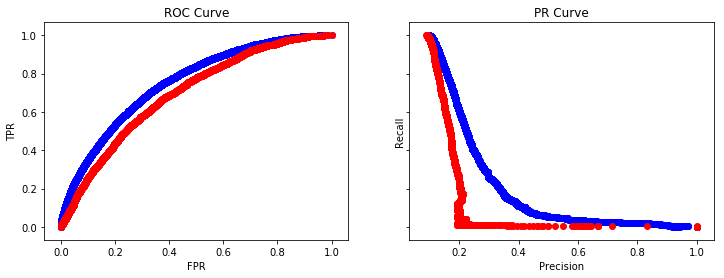

----- k = 0.500000 -----
Time elapsed (Training): 10.9585 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751971
PRAUC Score (Training): 0.166846
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695372
PRAUC Score (Validation): 0.078343
Time elapsed (Evaluation): 0.4459 s


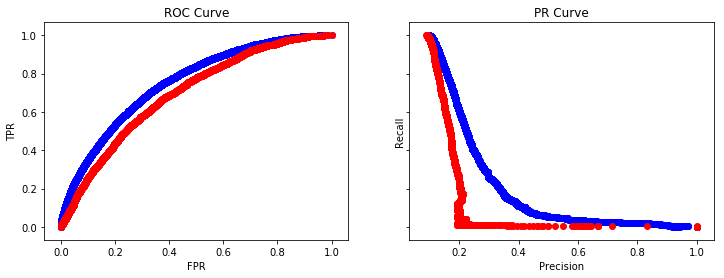

----- k = 0.600000 -----
Time elapsed (Training): 11.3844 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751971
PRAUC Score (Training): 0.166846
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695372
PRAUC Score (Validation): 0.078343
Time elapsed (Evaluation): 0.4389 s


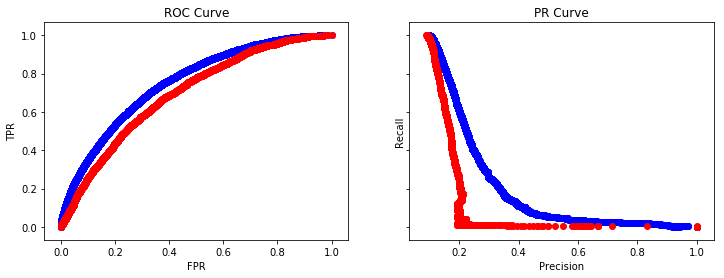

In [18]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %f -----' % k)
    param.update({'gamma': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

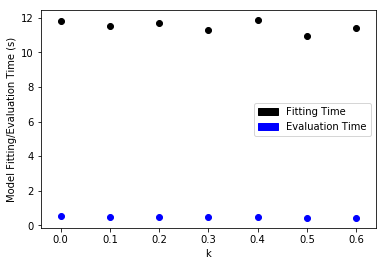

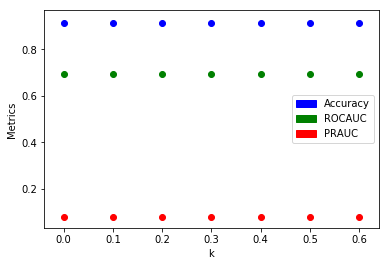

   0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  0.0    0.912017  0.695386  0.078347   11.840212     0.509837
1  0.1    0.912017  0.695386  0.078347   11.519330     0.451857
2  0.2    0.912017  0.695386  0.078347   11.712254     0.487844
3  0.3    0.912017  0.695359  0.078336   11.275392     0.475849
4  0.4    0.912017  0.695372  0.078343   11.847224     0.472850
5  0.5    0.912017  0.695372  0.078343   10.958492     0.445859
6  0.6    0.912017  0.695372  0.078343   11.384359     0.438861


            0_k    1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count  7.000000  7.000000e+00  7.000000  7.000000    7.000000     7.000000
mean   0.300000  9.120171e-01  0.695376  0.078344   11.505323     0.468994
std    0.216025  1.199178e-16  0.000010  0.000004    0.326238     0.025240
min    0.000000  9.120171e-01  0.695359  0.078336   10.958492     0.438861
25%    0.150000  9.120171e-01  0.695372  0.078343   11.329875     0.448858
50%    0.300000  9.120171e-01  0.695

In [19]:
utils.plot_metrics(ks, 'k', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

Same as above, the tree complexity has been limited by two hyperparameters already, so there isn't much effect brought by setting __gamma__.

## Subsample Size

The ratio of samples being randomly selected to train the model. This prevents overfitting.

In [20]:
# Update parameter value chosen by the previous experiment

param.update({'gamma': 0})
print(param)

{'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0}


In [21]:
# Define a list of values to try

ks = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

----- k = 0.400000 -----
Time elapsed (Training): 10.3557 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.741906
PRAUC Score (Training): 0.157132
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.689071
PRAUC Score (Validation): 0.116426
Time elapsed (Evaluation): 0.4449 s


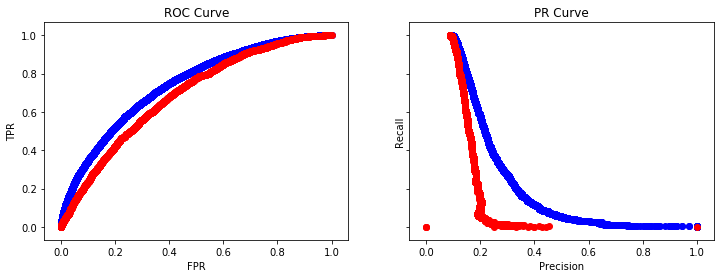

----- k = 0.500000 -----
Time elapsed (Training): 11.0974 s
Accuracy Score (Training): 0.906146
ROCAUC Score (Training): 0.746604
PRAUC Score (Training): 0.162634
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.691654
PRAUC Score (Validation): 0.076572
Time elapsed (Evaluation): 0.4449 s


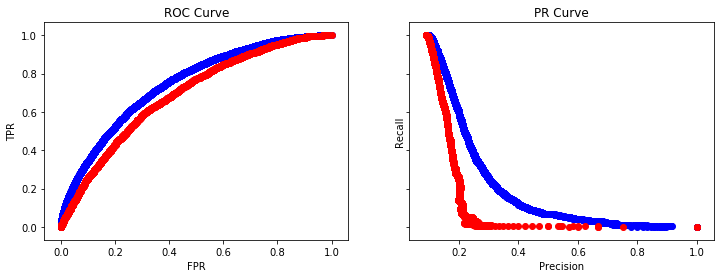

----- k = 0.600000 -----
Time elapsed (Training): 11.2724 s
Accuracy Score (Training): 0.906158
ROCAUC Score (Training): 0.747228
PRAUC Score (Training): 0.160861
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.688930
PRAUC Score (Validation): 0.119116
Time elapsed (Evaluation): 0.4988 s


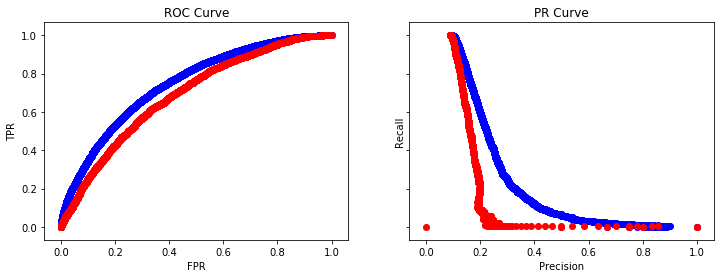

----- k = 0.700000 -----
Time elapsed (Training): 11.2074 s
Accuracy Score (Training): 0.906289
ROCAUC Score (Training): 0.748033
PRAUC Score (Training): 0.169987
Accuracy Score (Validation): 0.911875
ROCAUC Score (Validation): 0.691196
PRAUC Score (Validation): 0.122714
Time elapsed (Evaluation): 0.4629 s


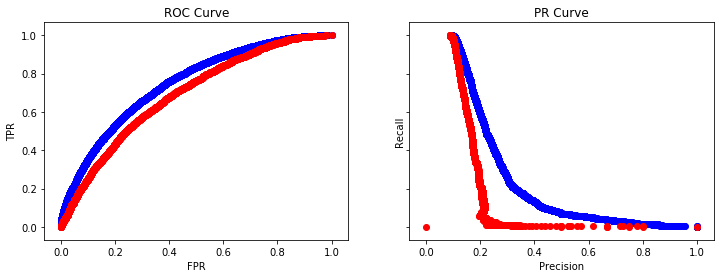

----- k = 0.800000 -----
Time elapsed (Training): 11.2524 s
Accuracy Score (Training): 0.906265
ROCAUC Score (Training): 0.750472
PRAUC Score (Training): 0.173426
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.690690
PRAUC Score (Validation): 0.125171
Time elapsed (Evaluation): 0.4619 s


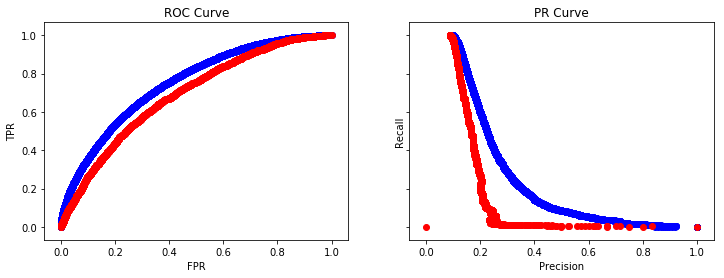

----- k = 0.900000 -----
Time elapsed (Training): 11.3194 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.752606
PRAUC Score (Training): 0.172270
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.691321
PRAUC Score (Validation): 0.077800
Time elapsed (Evaluation): 0.4359 s


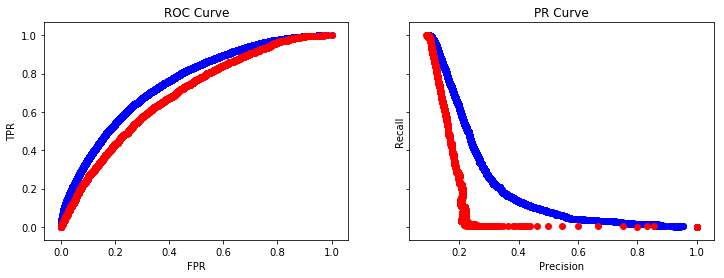

----- k = 1.000000 -----
Time elapsed (Training): 11.4274 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4689 s


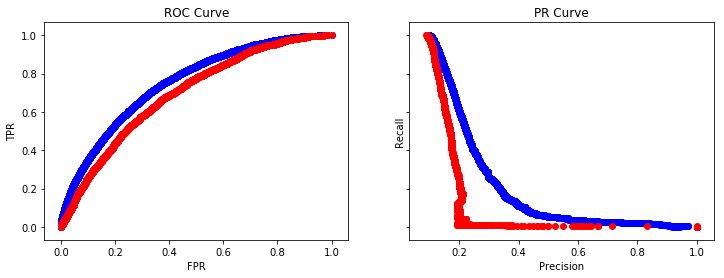

In [22]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %f -----' % k)
    param.update({'subsample': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

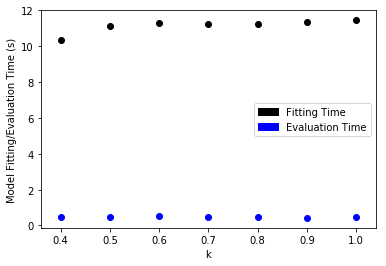

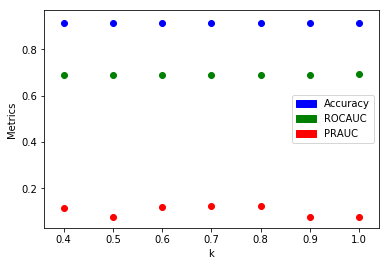

   0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  0.4    0.911827  0.689071  0.116426   10.355701     0.444859
1  0.5    0.911827  0.691654  0.076572   11.097449     0.444858
2  0.6    0.911827  0.688930  0.119116   11.272409     0.498841
3  0.7    0.911875  0.691196  0.122714   11.207416     0.462853
4  0.8    0.911922  0.690690  0.125171   11.252415     0.461854
5  0.9    0.912017  0.691321  0.077800   11.319377     0.435862
6  1.0    0.912017  0.695386  0.078347   11.427354     0.468852


            0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count  7.000000    7.000000  7.000000  7.000000    7.000000     7.000000
mean   0.700000    0.911902  0.691178  0.102307   11.133160     0.459711
std    0.216025    0.000086  0.002148  0.023303    0.357321     0.020973
min    0.400000    0.911827  0.688930  0.076572   10.355701     0.435862
25%    0.550000    0.911827  0.689880  0.078074   11.152432     0.444858
50%    0.700000    0.911875  0.691196  0.116426 

In [23]:
utils.plot_metrics(ks, 'k', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The ROCAUC is the best when __subsumple__=1.

## Colsample by Tree

The ratio of columns randomly selected to train each tree. Also prevents overfitting.

In [24]:
# Update parameter value chosen by the previous experiment

param.update({'subsample': 1})
print(param)

{'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0, 'subsample': 1}


In [25]:
# Define a list of values to try

ks = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

----- k = 0.400000 -----
Time elapsed (Training): 5.0234 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.745635
PRAUC Score (Training): 0.172052
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.683353
PRAUC Score (Validation): 0.077061
Time elapsed (Evaluation): 0.4427 s


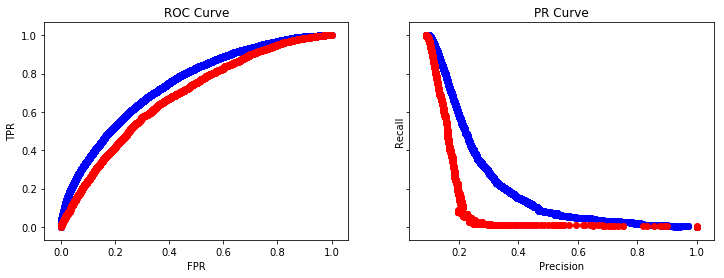

----- k = 0.500000 -----
Time elapsed (Training): 6.3360 s
Accuracy Score (Training): 0.906217
ROCAUC Score (Training): 0.746345
PRAUC Score (Training): 0.168653
Accuracy Score (Validation): 0.911875
ROCAUC Score (Validation): 0.684298
PRAUC Score (Validation): 0.074495
Time elapsed (Evaluation): 0.4619 s


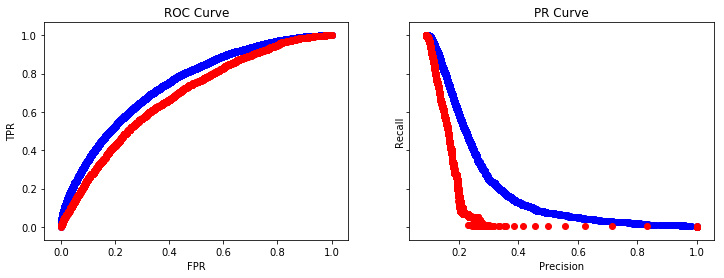

----- k = 0.600000 -----
Time elapsed (Training): 7.0837 s
Accuracy Score (Training): 0.906324
ROCAUC Score (Training): 0.747584
PRAUC Score (Training): 0.167180
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.688147
PRAUC Score (Validation): 0.079942
Time elapsed (Evaluation): 0.4908 s


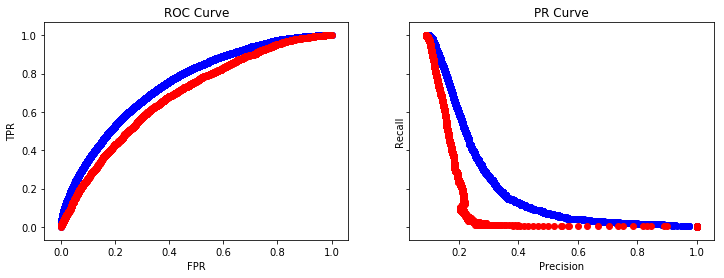

----- k = 0.700000 -----
Time elapsed (Training): 8.0644 s
Accuracy Score (Training): 0.906289
ROCAUC Score (Training): 0.748030
PRAUC Score (Training): 0.169271
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.691173
PRAUC Score (Validation): 0.080324
Time elapsed (Evaluation): 0.4499 s


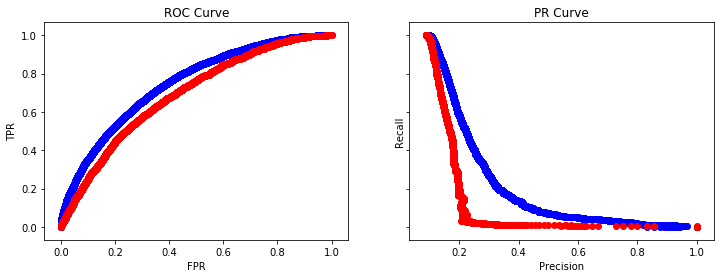

----- k = 0.800000 -----
Time elapsed (Training): 9.0626 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.750059
PRAUC Score (Training): 0.171182
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.689731
PRAUC Score (Validation): 0.077122
Time elapsed (Evaluation): 0.4809 s


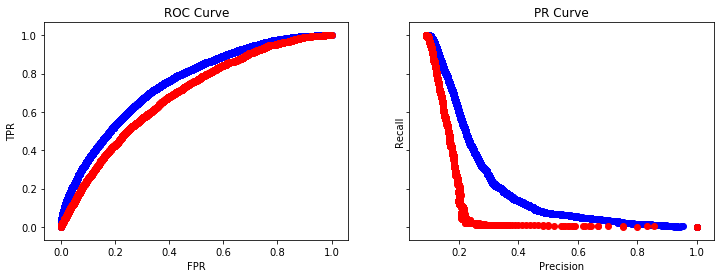

----- k = 0.900000 -----
Time elapsed (Training): 10.1313 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.753012
PRAUC Score (Training): 0.164877
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.692937
PRAUC Score (Validation): 0.077995
Time elapsed (Evaluation): 0.4459 s


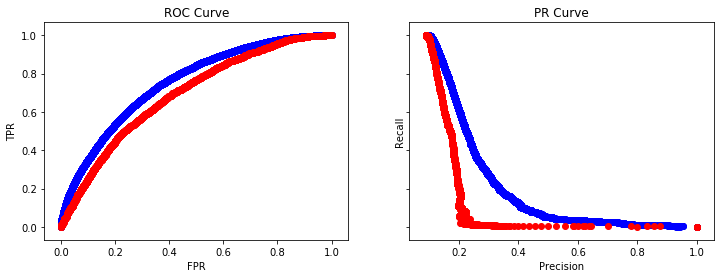

----- k = 1.000000 -----
Time elapsed (Training): 10.8785 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4309 s


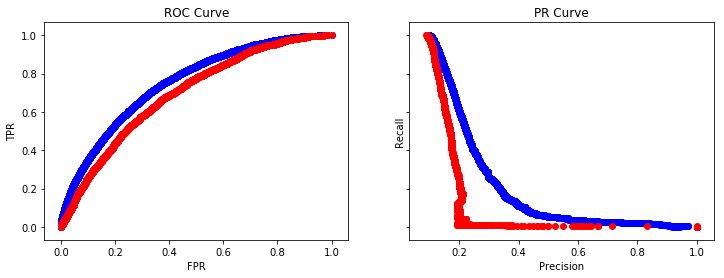

In [26]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %f -----' % k)
    param.update({'colsample_bytree': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

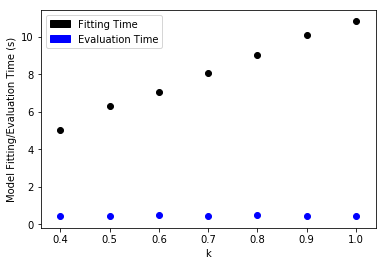

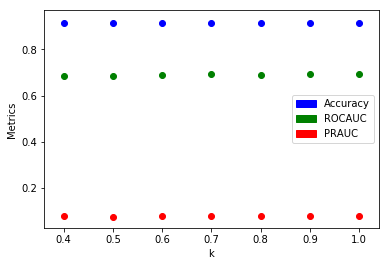

   0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  0.4    0.911922  0.683353  0.077061    5.023384     0.442733
1  0.5    0.911875  0.684298  0.074495    6.335966     0.461854
2  0.6    0.912017  0.688147  0.079942    7.083730     0.490844
3  0.7    0.911922  0.691173  0.080324    8.064416     0.449857
4  0.8    0.912017  0.689731  0.077122    9.062603     0.480866
5  0.9    0.911970  0.692937  0.077995   10.131279     0.445859
6  1.0    0.912017  0.695386  0.078347   10.878520     0.430864


            0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count  7.000000    7.000000  7.000000  7.000000    7.000000     7.000000
mean   0.700000    0.911963  0.689289  0.077898    8.082843     0.457554
std    0.216025    0.000058  0.004391  0.001964    2.096913     0.021596
min    0.400000    0.911875  0.683353  0.074495    5.023384     0.430864
25%    0.550000    0.911922  0.686223  0.077091    6.709848     0.444296
50%    0.700000    0.911970  0.689731  0.077995 

In [27]:
utils.plot_metrics(ks, 'k', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

Similar to __subsample__, I also got the highest ROCAUC at __colsample_bytree__=1.

## L2 Regularization

The L2 regularization term __lambda__ has a default value of 1.

In [28]:
# Update parameter value chosen by the previous experiment

param.update({'colsample_bytree': 1})
print(param)

{'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1}


In [29]:
# Define a list of values to try

ks = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]

----- k = 0.000000 -----
Time elapsed (Training): 10.9861 s
Accuracy Score (Training): 0.906336
ROCAUC Score (Training): 0.753912
PRAUC Score (Training): 0.173182
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.693621
PRAUC Score (Validation): 0.074962
Time elapsed (Evaluation): 0.4649 s


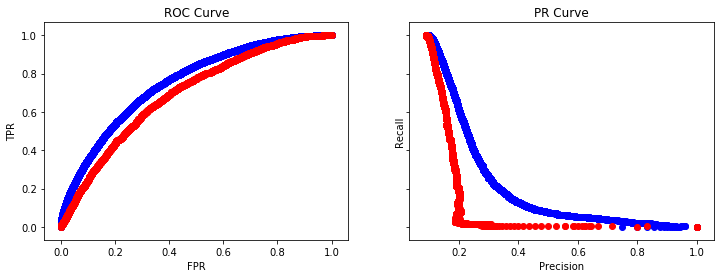

----- k = 0.010000 -----
Time elapsed (Training): 10.9075 s
Accuracy Score (Training): 0.906324
ROCAUC Score (Training): 0.753908
PRAUC Score (Training): 0.173144
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.693619
PRAUC Score (Validation): 0.074970
Time elapsed (Evaluation): 0.4389 s


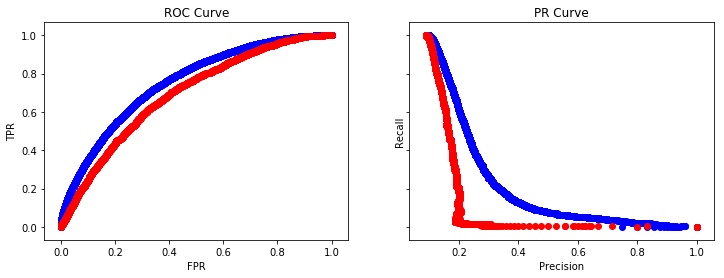

----- k = 0.020000 -----
Time elapsed (Training): 11.0245 s
Accuracy Score (Training): 0.906324
ROCAUC Score (Training): 0.753984
PRAUC Score (Training): 0.172771
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.693551
PRAUC Score (Validation): 0.074824
Time elapsed (Evaluation): 0.4549 s


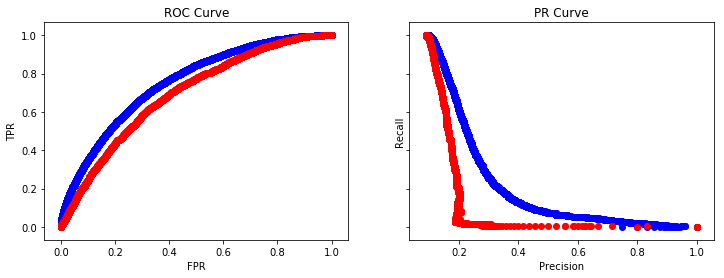

----- k = 0.050000 -----
Time elapsed (Training): 10.9665 s
Accuracy Score (Training): 0.906336
ROCAUC Score (Training): 0.754516
PRAUC Score (Training): 0.171813
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.692758
PRAUC Score (Validation): 0.073454
Time elapsed (Evaluation): 0.4529 s


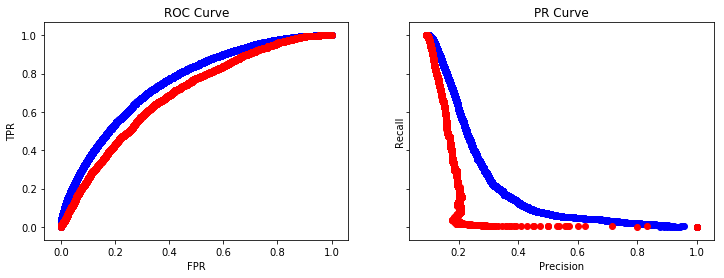

----- k = 0.100000 -----
Time elapsed (Training): 11.1782 s
Accuracy Score (Training): 0.906324
ROCAUC Score (Training): 0.753709
PRAUC Score (Training): 0.168799
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.691915
PRAUC Score (Validation): 0.073511
Time elapsed (Evaluation): 0.4509 s


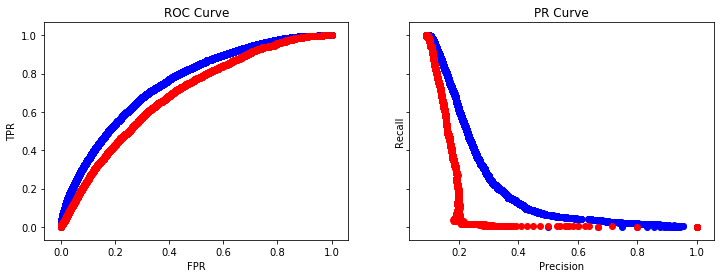

----- k = 0.200000 -----
Time elapsed (Training): 10.9595 s
Accuracy Score (Training): 0.906336
ROCAUC Score (Training): 0.755473
PRAUC Score (Training): 0.168078
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.692733
PRAUC Score (Validation): 0.073042
Time elapsed (Evaluation): 0.4299 s


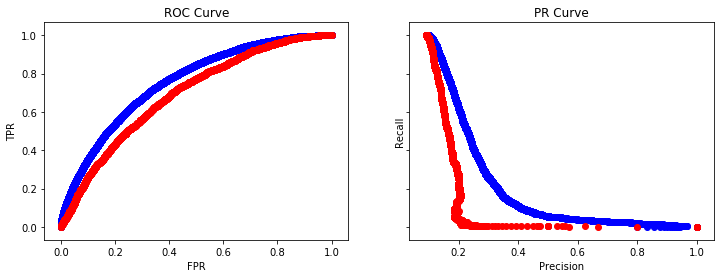

----- k = 0.500000 -----
Time elapsed (Training): 11.3474 s
Accuracy Score (Training): 0.906360
ROCAUC Score (Training): 0.752836
PRAUC Score (Training): 0.170788
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.690741
PRAUC Score (Validation): 0.076836
Time elapsed (Evaluation): 0.4629 s


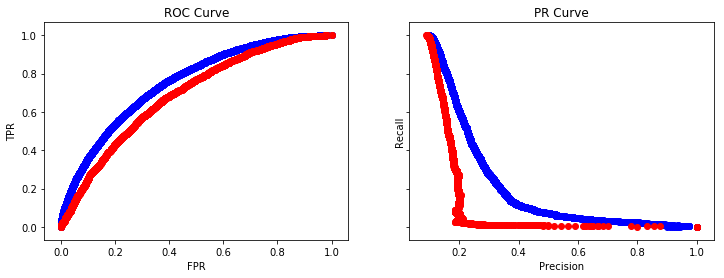

----- k = 1.000000 -----
Time elapsed (Training): 10.9685 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4828 s


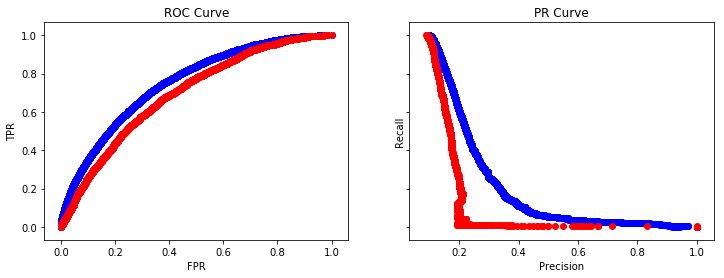

----- k = 2.000000 -----
Time elapsed (Training): 10.9135 s
Accuracy Score (Training): 0.906324
ROCAUC Score (Training): 0.750410
PRAUC Score (Training): 0.166158
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.692963
PRAUC Score (Validation): 0.079052
Time elapsed (Evaluation): 0.4219 s


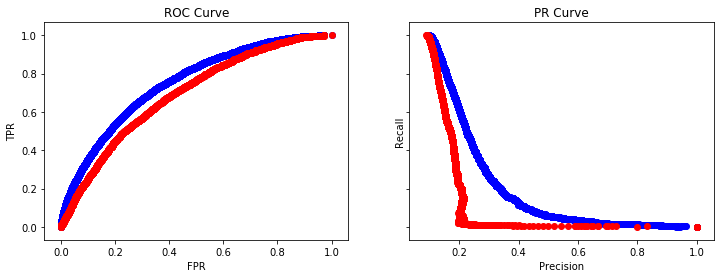

----- k = 5.000000 -----
Time elapsed (Training): 11.3640 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.744805
PRAUC Score (Training): 0.168043
Accuracy Score (Validation): 0.911875
ROCAUC Score (Validation): 0.689538
PRAUC Score (Validation): 0.077398
Time elapsed (Evaluation): 0.4419 s


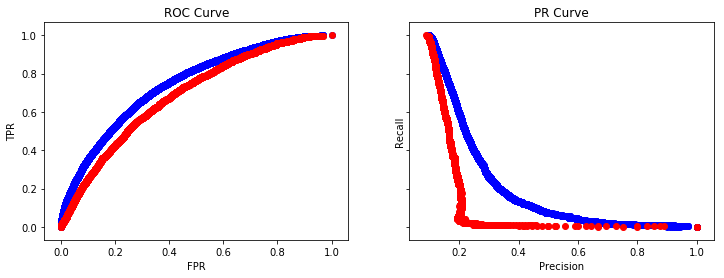

----- k = 10.000000 -----
Time elapsed (Training): 11.1499 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.735770
PRAUC Score (Training): 0.163893
Accuracy Score (Validation): 0.911875
ROCAUC Score (Validation): 0.689858
PRAUC Score (Validation): 0.123636
Time elapsed (Evaluation): 0.4239 s


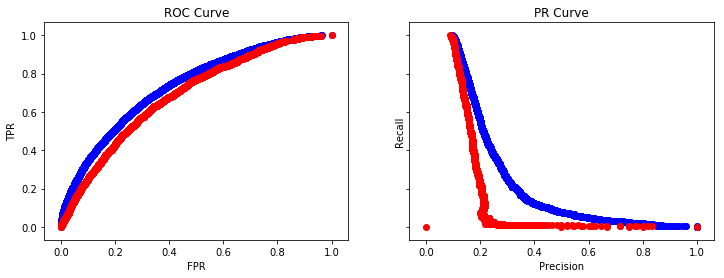

----- k = 20.000000 -----
Time elapsed (Training): 10.8026 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.723830
PRAUC Score (Training): 0.148998
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.685160
PRAUC Score (Validation): 0.080142
Time elapsed (Evaluation): 0.3819 s


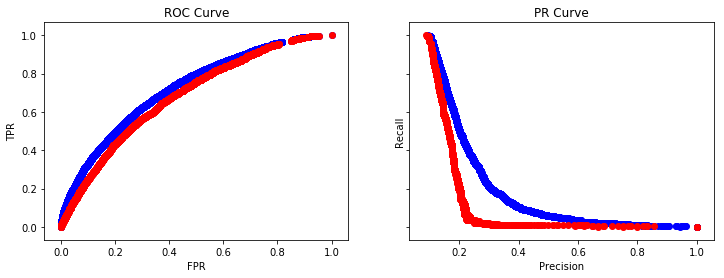

----- k = 50.000000 -----
Time elapsed (Training): 11.4433 s
Accuracy Score (Training): 0.906277
ROCAUC Score (Training): 0.705360
PRAUC Score (Training): 0.133940
Accuracy Score (Validation): 0.911922
ROCAUC Score (Validation): 0.677146
PRAUC Score (Validation): 0.074943
Time elapsed (Evaluation): 0.3279 s


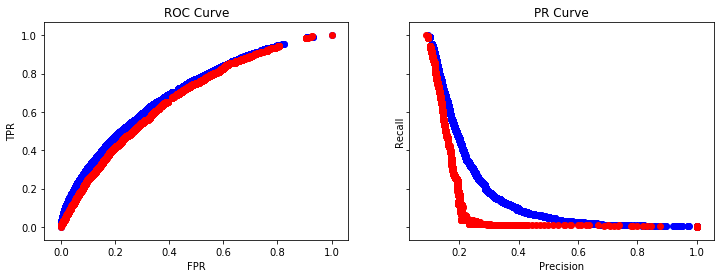

----- k = 100.000000 -----
Time elapsed (Training): 11.6933 s
Accuracy Score (Training): 0.906395
ROCAUC Score (Training): 0.687788
PRAUC Score (Training): 0.119798
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.665985
PRAUC Score (Validation): 0.071584
Time elapsed (Evaluation): 0.3159 s


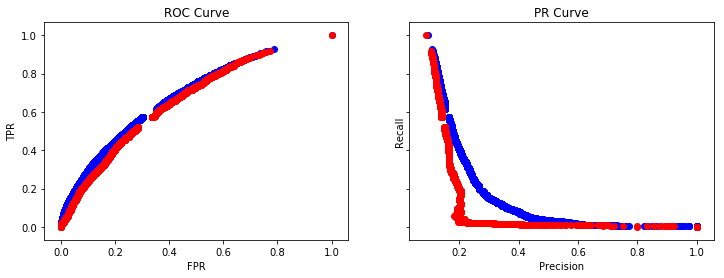

In [30]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %f -----' % k)
    param.update({'lambda': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

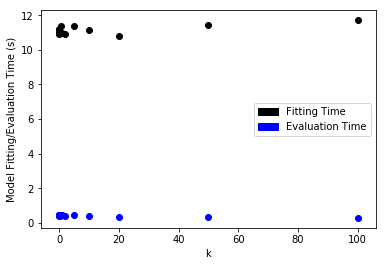

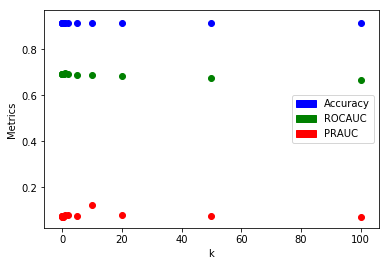

       0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     0.00    0.912017  0.693621  0.074962   10.986129     0.464851
1     0.01    0.912017  0.693619  0.074970   10.907526     0.438861
2     0.02    0.912017  0.693551  0.074824   11.024488     0.454855
3     0.05    0.911970  0.692758  0.073454   10.966491     0.452856
4     0.10    0.912017  0.691915  0.073511   11.178239     0.450856
5     0.20    0.911970  0.692733  0.073042   10.959493     0.429864
6     0.50    0.911970  0.690741  0.076836   11.347369     0.462853
7     1.00    0.912017  0.695386  0.078347   10.968505     0.482846
8     2.00    0.911970  0.692963  0.079052   10.913523     0.421866
9     5.00    0.911875  0.689538  0.077398   11.363993     0.441883
10   10.00    0.911875  0.689858  0.123636   11.149940     0.423865
11   20.00    0.911922  0.685160  0.080142   10.802559     0.381878
12   50.00    0.911922  0.677146  0.074943   11.443339     0.327896
13  100.00    0.912017  0.665985  0.071584   11.

In [31]:
utils.plot_metrics(ks, 'k', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

We can see the curves of the training and the validation sets got closer as regularization increases. However, ROCAUC also dropped. The best ROCAUC occurred at __lambda__=1.

## L1 Regularization

The L1 regularization term __alpha__ has a default value of 0.

In [32]:
# Update parameter value chosen by the previous experiment

param.update({'lambda': 1})
print(param)

{'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1, 'lambda': 1}


In [33]:
# Define a list of values to try

ks = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]

----- k = 0.000000 -----
Time elapsed (Training): 11.2884 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4479 s


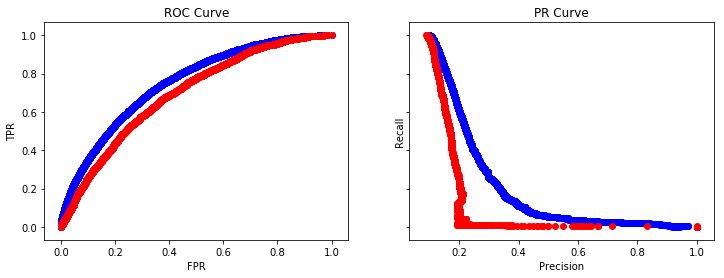

----- k = 0.010000 -----
Time elapsed (Training): 11.8322 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.752873
PRAUC Score (Training): 0.168464
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.693124
PRAUC Score (Validation): 0.078329
Time elapsed (Evaluation): 0.4858 s


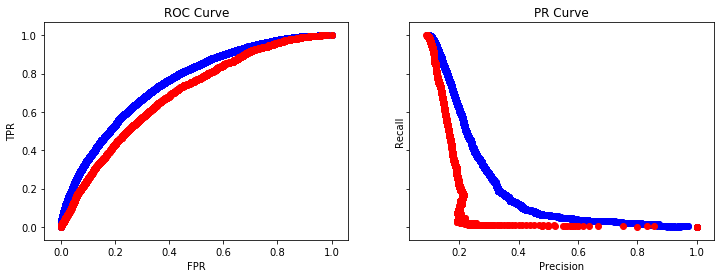

----- k = 0.020000 -----
Time elapsed (Training): 11.7392 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.752869
PRAUC Score (Training): 0.168438
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.693125
PRAUC Score (Validation): 0.078315
Time elapsed (Evaluation): 0.4689 s


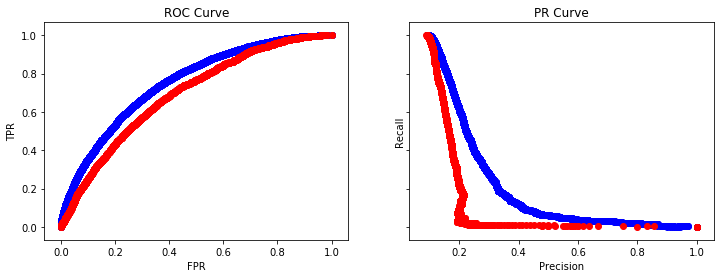

----- k = 0.050000 -----
Time elapsed (Training): 11.6933 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.752230
PRAUC Score (Training): 0.166169
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.694546
PRAUC Score (Validation): 0.077699
Time elapsed (Evaluation): 0.4529 s


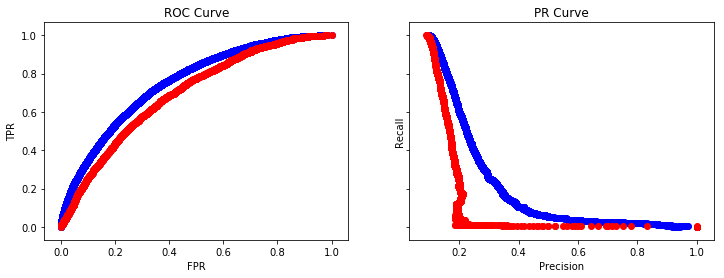

----- k = 0.100000 -----
Time elapsed (Training): 11.8102 s
Accuracy Score (Training): 0.906277
ROCAUC Score (Training): 0.751884
PRAUC Score (Training): 0.167403
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.692585
PRAUC Score (Validation): 0.076903
Time elapsed (Evaluation): 0.4768 s


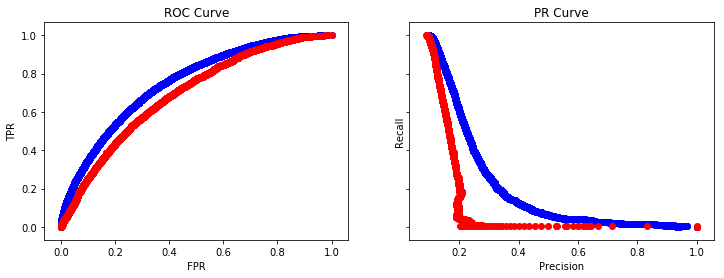

----- k = 0.200000 -----
Time elapsed (Training): 11.7233 s
Accuracy Score (Training): 0.906336
ROCAUC Score (Training): 0.752347
PRAUC Score (Training): 0.170212
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.691755
PRAUC Score (Validation): 0.076502
Time elapsed (Evaluation): 0.4549 s


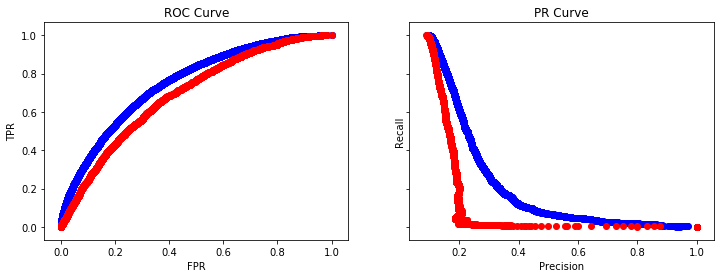

----- k = 0.500000 -----
Time elapsed (Training): 11.3974 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.750578
PRAUC Score (Training): 0.168207
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.693306
PRAUC Score (Validation): 0.079369
Time elapsed (Evaluation): 0.4938 s


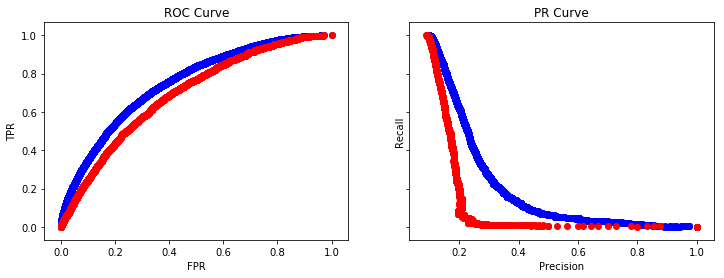

----- k = 1.000000 -----
Time elapsed (Training): 11.1864 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.748276
PRAUC Score (Training): 0.165408
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.690915
PRAUC Score (Validation): 0.077402
Time elapsed (Evaluation): 0.4289 s


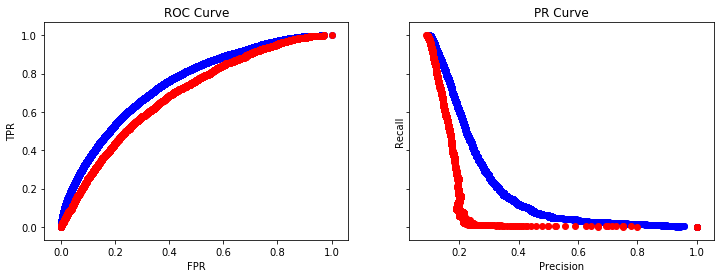

----- k = 2.000000 -----
Time elapsed (Training): 11.5843 s
Accuracy Score (Training): 0.906277
ROCAUC Score (Training): 0.744954
PRAUC Score (Training): 0.168459
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.691772
PRAUC Score (Validation): 0.078996
Time elapsed (Evaluation): 0.4669 s


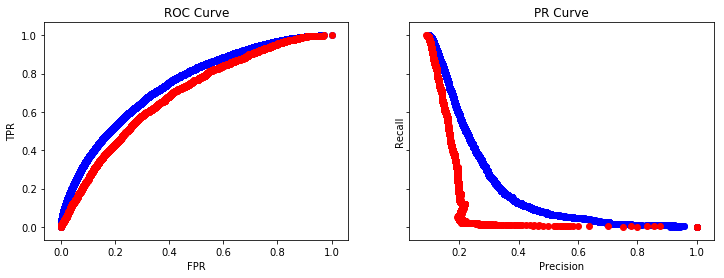

----- k = 5.000000 -----
Time elapsed (Training): 11.1134 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.731258
PRAUC Score (Training): 0.153266
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.685827
PRAUC Score (Validation): 0.076618
Time elapsed (Evaluation): 0.4489 s


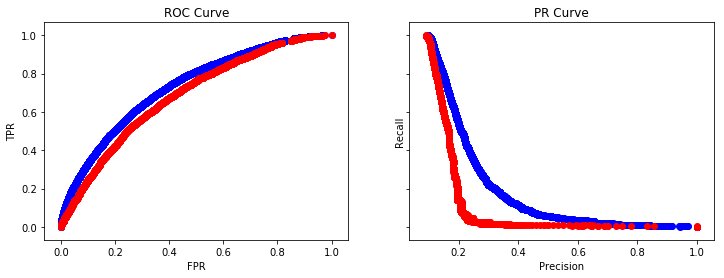

----- k = 10.000000 -----
Time elapsed (Training): 11.2634 s
Accuracy Score (Training): 0.906158
ROCAUC Score (Training): 0.718783
PRAUC Score (Training): 0.135747
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.684974
PRAUC Score (Validation): 0.122714
Time elapsed (Evaluation): 0.3699 s


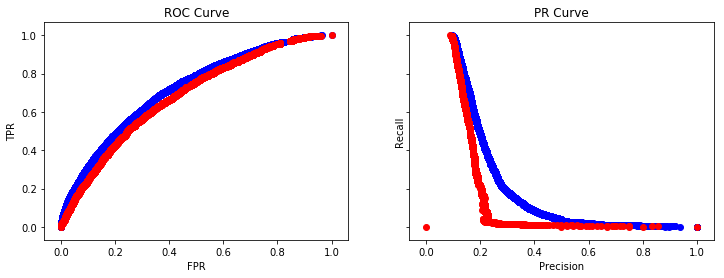

----- k = 20.000000 -----
Time elapsed (Training): 11.0325 s
Accuracy Score (Training): 0.906111
ROCAUC Score (Training): 0.702563
PRAUC Score (Training): 0.120420
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.678068
PRAUC Score (Validation): 0.119444
Time elapsed (Evaluation): 0.3159 s


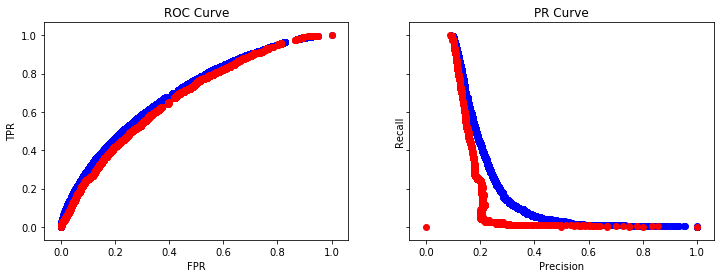

----- k = 50.000000 -----
Time elapsed (Training): 10.9245 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.682705
PRAUC Score (Training): 0.106959
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.667688
PRAUC Score (Validation): 0.071493
Time elapsed (Evaluation): 0.2769 s


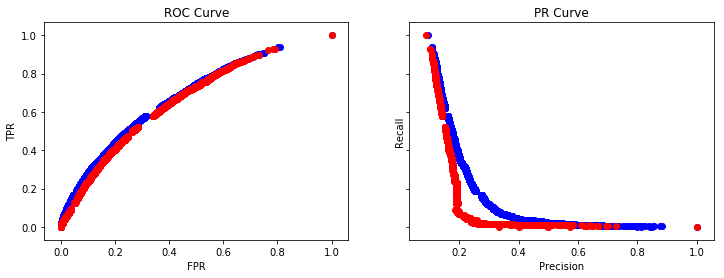

----- k = 100.000000 -----
Time elapsed (Training): 10.7936 s
Accuracy Score (Training): 0.906099
ROCAUC Score (Training): 0.677070
PRAUC Score (Training): 0.100662
Accuracy Score (Validation): 0.911827
ROCAUC Score (Validation): 0.663234
PRAUC Score (Validation): 0.071615
Time elapsed (Evaluation): 0.2449 s


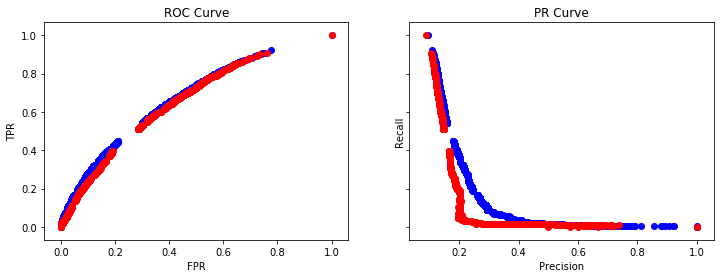

In [34]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %f -----' % k)
    param.update({'alpha': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

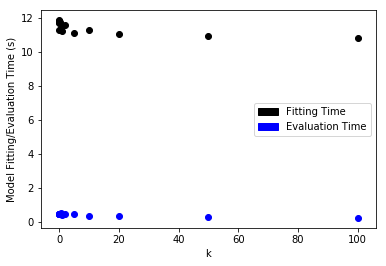

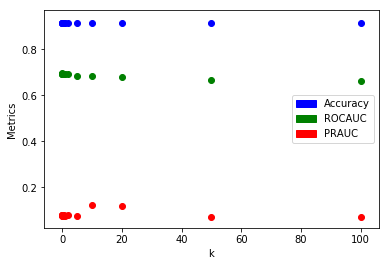

       0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     0.00    0.912017  0.695386  0.078347   11.288403     0.447857
1     0.01    0.912017  0.693124  0.078329   11.832217     0.485846
2     0.02    0.912017  0.693125  0.078315   11.739248     0.468850
3     0.05    0.912017  0.694546  0.077699   11.693260     0.452855
4     0.10    0.911970  0.692585  0.076903   11.810225     0.476848
5     0.20    0.911970  0.691755  0.076502   11.723264     0.454855
6     0.50    0.911970  0.693306  0.079369   11.397369     0.493843
7     1.00    0.911970  0.690915  0.077402   11.186436     0.428864
8     2.00    0.911970  0.691772  0.078996   11.584294     0.466851
9     5.00    0.911970  0.685827  0.076618   11.113444     0.448857
10   10.00    0.911827  0.684974  0.122714   11.263410     0.369882
11   20.00    0.911827  0.678068  0.119444   11.032472     0.315899
12   50.00    0.911827  0.667688  0.071493   10.924505     0.276911
13  100.00    0.911827  0.663234  0.071615   10.

In [35]:
utils.plot_metrics(ks, 'k', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

Similar to L2 regularization, we can see the curves of the training and the validation sets got closer as regularization increases. However, ROCAUC also steadily decreased. The best ROCAUC occurred at __alpha__=0, also the default value. I wonder if this is because the earlier parameters were tuned when the later parameters were fixed at default values.

## Learning Rate

Step size shrinkage used in each of the new boosting iteration. Also prevents overfitting. Default value is 0.3.

In [36]:
# Update parameter value chosen by the previous experiment

param.update({'alpha': 0})
print(param)

{'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1, 'lambda': 1, 'alpha': 0}


In [37]:
# Define a list of values to try

ks = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0]

----- k = 0.001000 -----
Time elapsed (Training): 11.4114 s
Accuracy Score (Training): 0.906454
ROCAUC Score (Training): 0.686381
PRAUC Score (Training): 0.099650
Accuracy Score (Validation): 0.911401
ROCAUC Score (Validation): 0.658458
PRAUC Score (Validation): 0.049663
Time elapsed (Evaluation): 0.2299 s


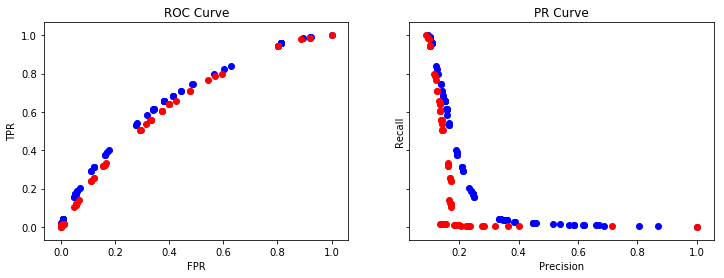

----- k = 0.002000 -----
Time elapsed (Training): 11.1694 s
Accuracy Score (Training): 0.906466
ROCAUC Score (Training): 0.689903
PRAUC Score (Training): 0.104342
Accuracy Score (Validation): 0.911733
ROCAUC Score (Validation): 0.658893
PRAUC Score (Validation): 0.049978
Time elapsed (Evaluation): 0.2229 s


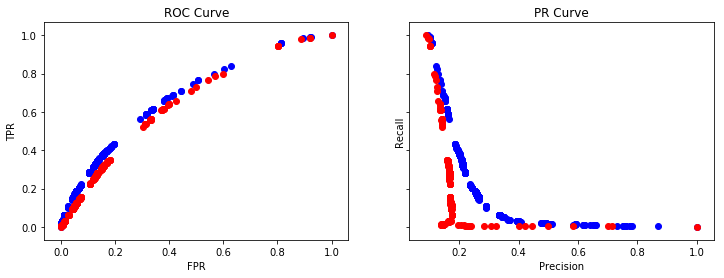

----- k = 0.005000 -----
Time elapsed (Training): 10.9875 s
Accuracy Score (Training): 0.906336
ROCAUC Score (Training): 0.706593
PRAUC Score (Training): 0.122970
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.671234
PRAUC Score (Validation): 0.061995
Time elapsed (Evaluation): 0.2479 s


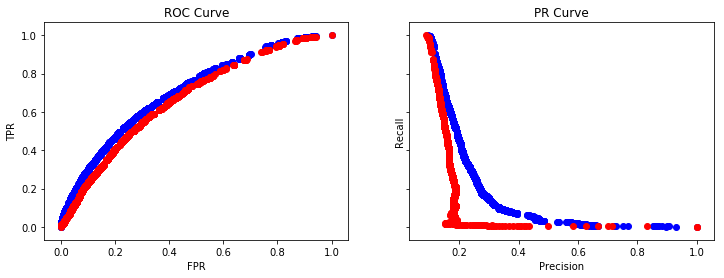

----- k = 0.010000 -----
Time elapsed (Training): 10.9795 s
Accuracy Score (Training): 0.906360
ROCAUC Score (Training): 0.713592
PRAUC Score (Training): 0.129597
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.675654
PRAUC Score (Validation): 0.069627
Time elapsed (Evaluation): 0.2859 s


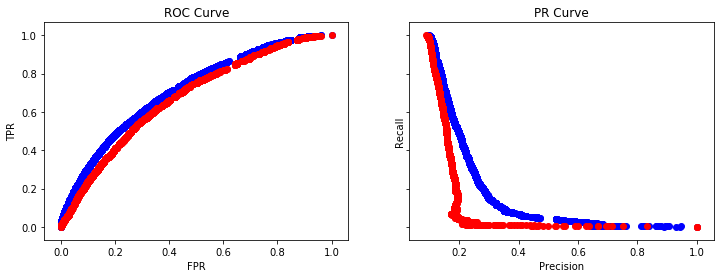

----- k = 0.020000 -----
Time elapsed (Training): 10.9145 s
Accuracy Score (Training): 0.906312
ROCAUC Score (Training): 0.724576
PRAUC Score (Training): 0.138861
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.682433
PRAUC Score (Validation): 0.075587
Time elapsed (Evaluation): 0.3529 s


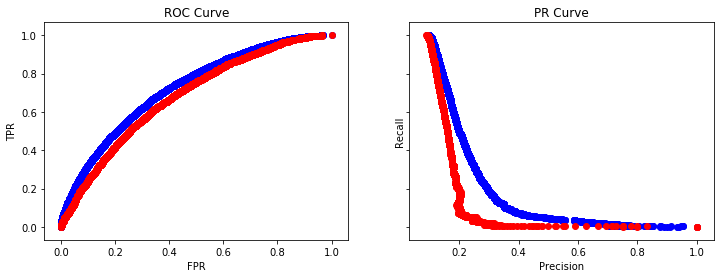

----- k = 0.050000 -----
Time elapsed (Training): 11.1132 s
Accuracy Score (Training): 0.906336
ROCAUC Score (Training): 0.739413
PRAUC Score (Training): 0.156411
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.688107
PRAUC Score (Validation): 0.077752
Time elapsed (Evaluation): 0.4189 s


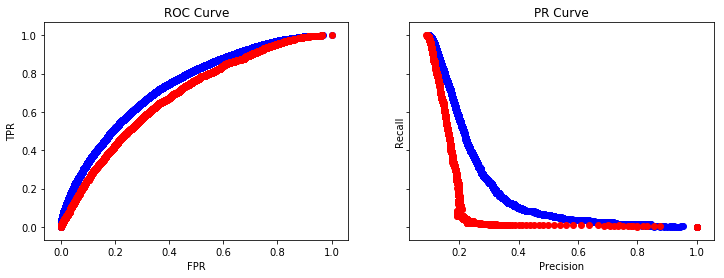

----- k = 0.100000 -----
Time elapsed (Training): 11.1874 s
Accuracy Score (Training): 0.906300
ROCAUC Score (Training): 0.751988
PRAUC Score (Training): 0.166903
Accuracy Score (Validation): 0.912017
ROCAUC Score (Validation): 0.695386
PRAUC Score (Validation): 0.078347
Time elapsed (Evaluation): 0.4669 s


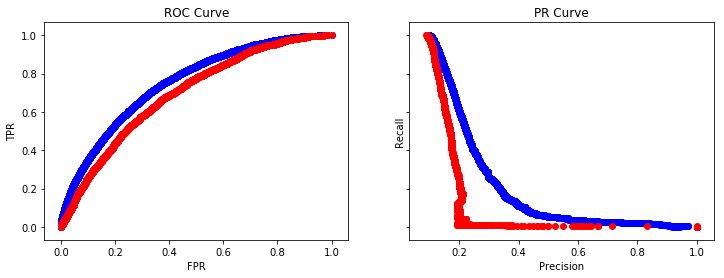

----- k = 0.200000 -----
Time elapsed (Training): 11.3529 s
Accuracy Score (Training): 0.906395
ROCAUC Score (Training): 0.775430
PRAUC Score (Training): 0.197994
Accuracy Score (Validation): 0.912064
ROCAUC Score (Validation): 0.696198
PRAUC Score (Validation): 0.084573
Time elapsed (Evaluation): 0.5098 s


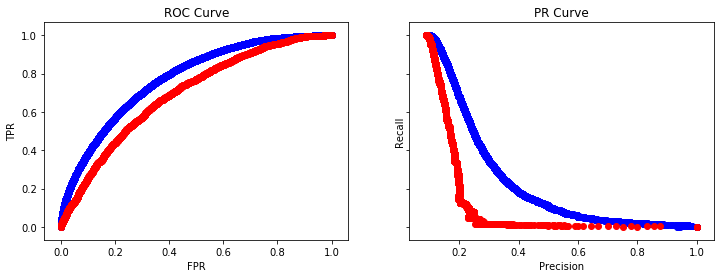

----- k = 0.300000 -----
Time elapsed (Training): 11.2346 s
Accuracy Score (Training): 0.906964
ROCAUC Score (Training): 0.786133
PRAUC Score (Training): 0.216058
Accuracy Score (Validation): 0.912444
ROCAUC Score (Validation): 0.698823
PRAUC Score (Validation): 0.093354
Time elapsed (Evaluation): 0.4619 s


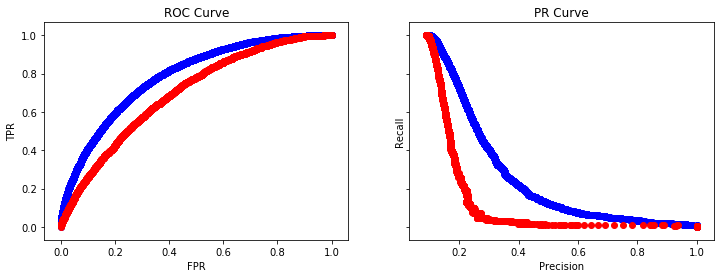

----- k = 0.500000 -----
Time elapsed (Training): 11.0051 s
Accuracy Score (Training): 0.908943
ROCAUC Score (Training): 0.811720
PRAUC Score (Training): 0.263990
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.704136
PRAUC Score (Validation): 0.095749
Time elapsed (Evaluation): 0.4679 s


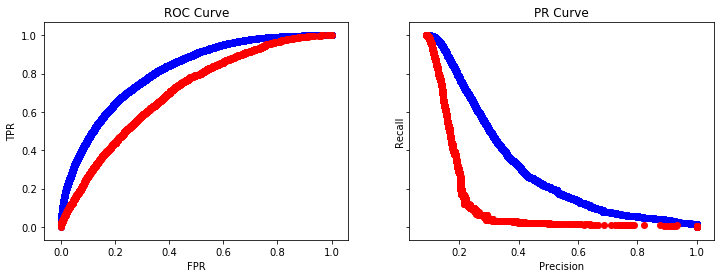

----- k = 1.000000 -----
Time elapsed (Training): 10.9615 s
Accuracy Score (Training): 0.911859
ROCAUC Score (Training): 0.822486
PRAUC Score (Training): 0.282378
Accuracy Score (Validation): 0.904338
ROCAUC Score (Validation): 0.677257
PRAUC Score (Validation): 0.074814
Time elapsed (Evaluation): 0.4649 s


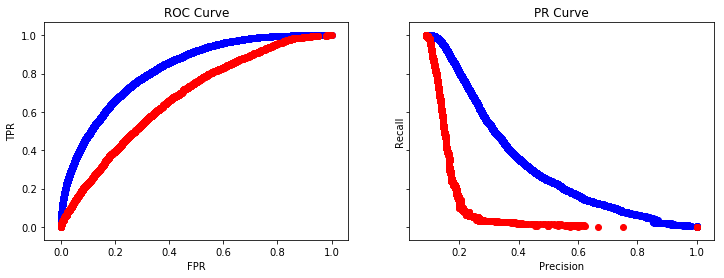

In [38]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %f -----' % k)
    param.update({'eta': k})
    bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
    acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

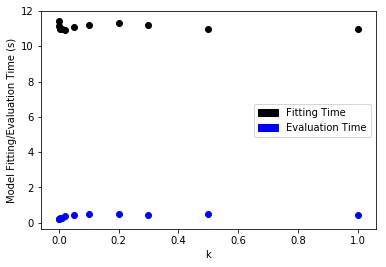

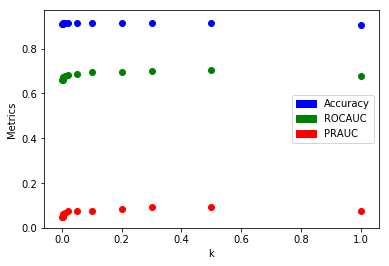

      0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0   0.001    0.911401  0.658458  0.049663   11.411366     0.229927
1   0.002    0.911733  0.658893  0.049978   11.169438     0.222928
2   0.005    0.911970  0.671234  0.061995   10.987498     0.247921
3   0.010    0.912017  0.675654  0.069627   10.979502     0.285911
4   0.020    0.911970  0.682433  0.075587   10.914508     0.352888
5   0.050    0.912017  0.688107  0.077752   11.113243     0.418887
6   0.100    0.912017  0.695386  0.078347   11.187434     0.466852
7   0.200    0.912064  0.696198  0.084573   11.352889     0.509838
8   0.300    0.912444  0.698823  0.093354   11.234599     0.461874
9   0.500    0.911970  0.704136  0.095749   11.005095     0.467850
10  1.000    0.904338  0.677257  0.074814   10.961509     0.464852


             0_k  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count  11.000000   11.000000  11.000000  11.000000   11.000000    11.000000
mean    0.198909    0.911267   0.682416   

In [39]:
utils.plot_metrics(ks, 'k', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

## Optimized Model

Finally, I train a model using the optimal values found in the above experiments.

In [40]:
param.update({'eta': 0.5})
print(param)

{'eta': 0.5, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1, 'lambda': 1, 'alpha': 0}


Time elapsed (Training): 10.6236 s
Accuracy Score (Training): 0.908943
ROCAUC Score (Training): 0.811720
PRAUC Score (Training): 0.263990
Accuracy Score (Validation): 0.911970
ROCAUC Score (Validation): 0.704136
PRAUC Score (Validation): 0.095749
Time elapsed (Evaluation): 0.4469 s


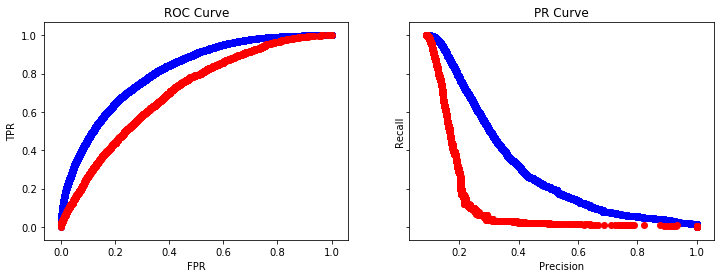

In [41]:
# Train the optimal model

bst, fit_time = xgb_utils.train_model(param, d_train, num_boost_round)
acc_score, rocauc_score, prauc_score, eval_time = xgb_utils.evaluate(bst, d_train, y_train, d_valid, y_valid)